In [2]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import matplotlib.ticker as mticker

from matplotlib.dates import DateFormatter
from datetime import timedelta

billboard_hot_100 = pd.read_csv("../billboard_hot_100.csv")
data_kaggle = pd.read_csv("tracks_features.csv")

billboard_hot_100["first_day_of_the_week"] = pd.to_datetime(billboard_hot_100["first_day_of_the_week"],
                                                            infer_datetime_format=True)

C:\Users\cutie\AppData\Local\Temp\ipykernel_12504\776058954.py:15: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  billboard_hot_100["first_day_of_the_week"] = pd.to_datetime(billboard_hot_100["first_day_of_the_week"],


In [3]:
billboard_hot_100["year"] = billboard_hot_100["first_day_of_the_week"].dt.year
billboard_hot_100["max_weeks_on_chart"] = billboard_hot_100.groupby(["artist", "song_name"])["weeks_on_chart"].transform("max")
billboard_hot_100["top_position"] = billboard_hot_100.groupby(["artist", "song_name"])["position"].transform("min")

In [4]:
# MTV Launch date
mtv_launch_date = pd.to_datetime("1981-08-01", infer_datetime_format=True)

# Spotify creation date
spotify_creation_date = pd.to_datetime("2008-01-01", infer_datetime_format=True)

# Youtube creation date
youtube_creation_date = pd.to_datetime("2005-02-14", infer_datetime_format=True)

# Apple music creation date
apple_music_creation_date = pd.to_datetime("2015-06-30", infer_datetime_format=True)

# CDs creation date
cds_creation_date = pd.to_datetime("1982-08-17", infer_datetime_format=True)

# MP3 creation date
mp3_creation_date = pd.to_datetime("1991-12-01", infer_datetime_format=True)

# iTunes release date
itunes_creation_date = pd.to_datetime("2001-01-09", infer_datetime_format=True)

# Cassettes creation date
cassettes_creation_date = pd.to_datetime("1963-08-30", infer_datetime_format=True)

C:\Users\cutie\AppData\Local\Temp\ipykernel_12504\1792693761.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  mtv_launch_date = pd.to_datetime("1981-08-01", infer_datetime_format=True)
C:\Users\cutie\AppData\Local\Temp\ipykernel_12504\1792693761.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  spotify_creation_date = pd.to_datetime("2008-01-01", infer_datetime_format=True)
C:\Users\cutie\AppData\Local\Temp\ipykernel_12504\1792693761.py:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict

In [5]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.style.use('tableau-colorblind10')


## Songs statistics

### Songs lifetime on chart

In [6]:
billboard_hot_100_subset = billboard_hot_100[["artist", "song_name", "year", "max_weeks_on_chart"]].drop_duplicates()

In [7]:
from scipy.stats import median_abs_deviation

def std_error_of_median(data):
    mad = median_abs_deviation(data)
    std_median = mad / np.sqrt(len(data))
    return std_median

In [8]:
avg_week_on_chart_yearly = billboard_hot_100_subset[["max_weeks_on_chart", "year"]].groupby(by="year").mean()
std_error = billboard_hot_100_subset[["year", "max_weeks_on_chart"]].groupby(by="year").sem()

median_weeks_on_chart_yearly = billboard_hot_100_subset[["max_weeks_on_chart", "year"]].groupby(by="year").median()
median_std_error = billboard_hot_100_subset[["year", "max_weeks_on_chart"]].groupby(by="year")["max_weeks_on_chart"].apply(
    std_error_of_median).rename("max_weeks_on_chart")

twntieth_weeks_on_chart_yearly = billboard_hot_100_subset[["max_weeks_on_chart", "year"]].groupby(by="year").quantile(0.2)

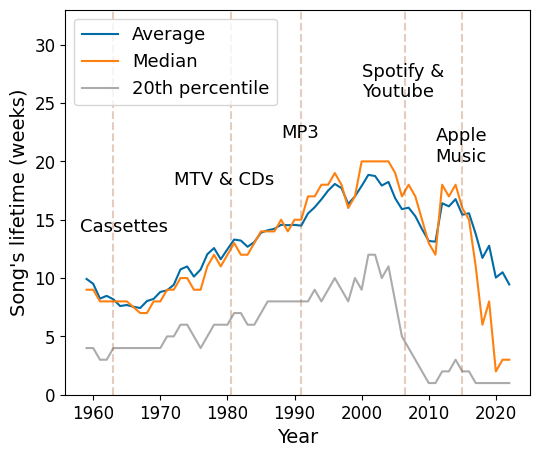

In [9]:
avg_weeks_on_chart_plot_yearly = avg_week_on_chart_yearly.plot(kind='line', figsize=(6, 5), legend=False)
median_weeks_on_chart_yearly.plot(kind='line', figsize=(6, 5), legend=False,
    ax=avg_weeks_on_chart_plot_yearly)
twntieth_weeks_on_chart_yearly.plot(kind='line', figsize=(6, 5), legend=False,
    ax=avg_weeks_on_chart_plot_yearly)

brown = "#a65628"
avg_weeks_on_chart_plot_yearly.axvline(x = youtube_creation_date.year + ((spotify_creation_date.year - youtube_creation_date.year)/2),
                                color=brown, ls="dashed", alpha=0.3)
avg_weeks_on_chart_plot_yearly.axvline(x = apple_music_creation_date.year, color=brown, ls="dashed", alpha=0.3)
avg_weeks_on_chart_plot_yearly.axvline(x = mtv_launch_date.year + ((mtv_launch_date.year - cds_creation_date.year)/2), color=brown,
                                ls="dashed", alpha=0.3)
avg_weeks_on_chart_plot_yearly.axvline(x = mp3_creation_date.year, color=brown, ls="dashed", alpha=0.3)
avg_weeks_on_chart_plot_yearly.axvline(x = cassettes_creation_date.year, color=brown, ls="dashed", alpha=0.3)

plt.text(youtube_creation_date.year - 5, 25.5, "Spotify &\nYoutube", fontsize=13)
plt.text(apple_music_creation_date.year - 4, 20, "Apple\nMusic", fontsize=13)
plt.text(mtv_launch_date.year - 9, 18, "MTV & CDs", fontsize=13)
plt.text(mp3_creation_date.year - 3, 22, "MP3", fontsize=13)
plt.text(cassettes_creation_date.year - 5, 14, "Cassettes", fontsize=13)

plt.xlabel("Year")
plt.ylabel("Song's lifetime (weeks)")
plt.legend(["Average", "Median", "20th percentile"], loc="upper left", fontsize=13)
plt.ylim([0, 33])

# plt.savefig("figures/average_weeks_on_chart_yearly.pdf", format="pdf")
plt.show()

In [52]:
def permutation_test_with_observed_values(X, Y, observed_slope, observed_intercept, num_permutations=10000):
    permuted_slopes = []
    
    for _ in range(num_permutations):
        X_permuted = np.random.permutation(X)
        
        permuted_slope, _ = np.polyfit(X_permuted, Y, 1)
        permuted_slopes.append(permuted_slope)
    
    permuted_slopes = np.array(permuted_slopes)
    
    p_value = np.mean(np.abs(permuted_slopes) >= np.abs(observed_slope))
    
    lower_bound = np.percentile(permuted_slopes, 2.5)
    upper_bound = np.percentile(permuted_slopes, 97.5)
    
    return {
        "observed_slope": observed_slope,
        "observed_intercept": observed_intercept,
        "slope_p_value": p_value,
        "slope_CI": (lower_bound, upper_bound)
    }


def test_segments(X, Y, breakpoints, slopes, intercepts, num_permutations=10000):
    results = []
    
    if len(breakpoints) != len(slopes) - 1 or len(breakpoints) != len(intercepts) - 1:
        raise ValueError("For n segments, there should be n-1 breakpoints, n slopes, and n intercepts.")
    
    breakpoints = [-np.inf] + breakpoints + [np.inf]
    
    for i in range(1, len(breakpoints)):
        segment_mask = (X > breakpoints[i-1]) & (X <= breakpoints[i])
        X_segment = X[segment_mask]
        Y_segment = Y[segment_mask]
        
        observed_slope = slopes[i-1]
        observed_intercept = intercepts[i-1]
        
        segment_result = permutation_test_with_observed_values(X_segment, Y_segment, observed_slope, observed_intercept, num_permutations)
        results.append({
            "segment": i,
            "observed_slope": segment_result["observed_slope"],
            "observed_intercept": segment_result["observed_intercept"],
            "slope_p_value": segment_result["slope_p_value"],
            "slope_CI": segment_result["slope_CI"]
        })
    
    return results

R-squared for model with breakpoint at 1960.0 segments: 0.398988478207452
R-squared for model with breakpoint at 1966.6666666666667 segments: 0.4109377752413387
R-squared for model with breakpoint at 1973.3333333333333 segments: 0.4812616608689785
R-squared for model with breakpoint at 1980.0 segments: 0.5779093836643059
R-squared for model with breakpoint at 1986.6666666666667 segments: 0.6803801043797972
R-squared for model with breakpoint at 1993.3333333333333 segments: 0.7943428655050352
R-squared for model with breakpoint at 2000.0 segments: 0.8783821485768418
R-squared for model with breakpoint at 2006.6666666666667 segments: 0.8419806812249099
R-squared for model with breakpoint at 2013.3333333333333 segments: 0.7658870927872841
R-squared for model with breakpoint at 2020.0 segments: 0.5328678844500156
Best r squared: 0.8783821485768418
P values: [8.93637638e-23 2.80574042e-11 9.30739726e-05]
Slopes: [ 0.13490494 -4.52980702]
Intercepts: [-255.15822613 9167.55994862]
[{'segment'

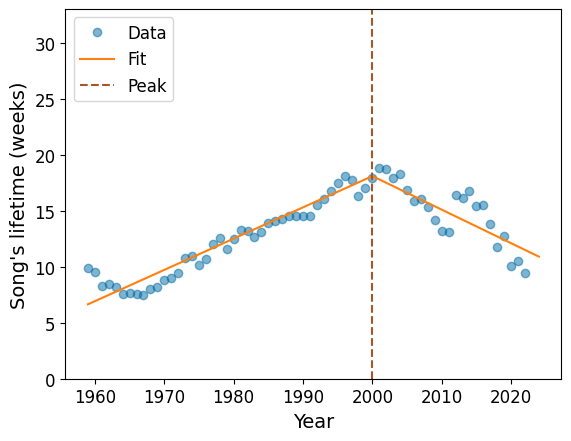

In [11]:
import numpy as np
import sys
import pwlf
import statsmodels.api as sm
import matplotlib.pyplot as plt

x = avg_week_on_chart_yearly.index.values
y = avg_week_on_chart_yearly.values.flatten()

best_model = None
r_squared_best = 0
y_hat = []
best_break = 1959
x_hat = np.linspace(1959, 2024, 100)

for i in np.linspace(1960, 2020, 10):
    model = pwlf.PiecewiseLinFit(x, y)
    values = model.fit_with_breaks([1959, i, 2024])
    print("R-squared for model with breakpoint at {} segments: {}".format(i, model.r_squared()))
    if model.r_squared() > r_squared_best:
        best_model = model
        r_squared_best = model.r_squared()
        best_break = i
        y_hat = model.predict(x_hat)

print(f"Best r squared: {best_model.r_squared()}")
# first intercepts + slopes, then breakpoints
print(f"P values: {model.p_values()}")
print(f"Slopes: {model.slopes}")
print(f"Intercepts: {model.intercepts}")
print(test_segments(x, y, [best_break], model.slopes, model.intercepts))

plt.ylabel("Song's lifetime (weeks)")
plt.xlabel("Year")
plt.plot(x, y, 'o', alpha=0.5, label="Data")
plt.plot(x_hat, y_hat, '-', label="Fit")
plt.ylim([0, 33])
plt.axvline(x=best_break, linestyle='--', color=brown, label="Peak")
plt.legend(loc="upper left")
plt.savefig("appendix/1.A.1.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show()

2001.9792830450222
[{'segment': 1, 'observed_slope': np.float64(-0.0013285372832180912), 'observed_intercept': np.float64(2.9244464776945382), 'slope_p_value': np.float64(0.0), 'slope_CI': (np.float64(-0.0006660029866173518), np.float64(0.0006746905081161072))}, {'segment': 2, 'observed_slope': np.float64(0.017522135184521913), 'observed_intercept': np.float64(-34.81420927418814), 'slope_p_value': np.float64(0.0), 'slope_CI': (np.float64(-0.007902685386541021), np.float64(0.008145054745716845))}]
R squared: 0.9102680071076288
P values: [4.01154686e-042 6.56341932e-004 6.32371570e-024 3.81971769e-151]
Slope: -0.0013285372832180912
Intercept: 2.9244464776945382
Slope: 0.017522135184521913
Intercept: -34.81420927418814


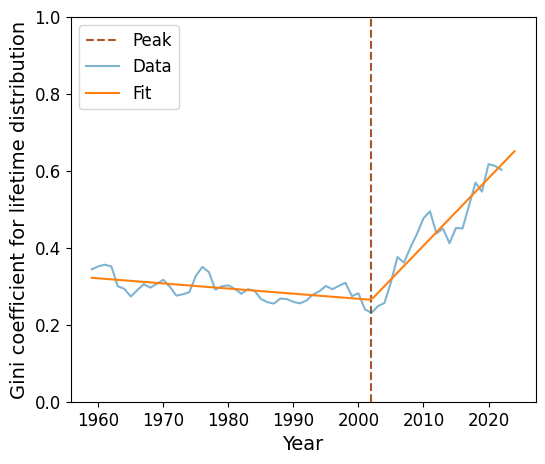

In [12]:
# gini coefficient using pairwisedifference formula for lifetime distribution
def gini_coefficient(data):
    n = len(data)
    data = np.sort(data)
    index = np.arange(1, n + 1)
    return (np.sum((2 * index - n - 1) * data)) / (n * np.sum(data))

gini_coefficient_yearly = billboard_hot_100_subset[["max_weeks_on_chart", "year"]].groupby(by="year")["max_weeks_on_chart"].apply(gini_coefficient)

model = pwlf.PiecewiseLinFit(gini_coefficient_yearly.index.values, gini_coefficient_yearly.values.flatten())
breaks = model.fit(2)
x_hat = np.linspace(1959, 2024, 100)
y_hat = model.predict(x_hat)
print(breaks[1])

print(test_segments(gini_coefficient_yearly.index.values,
                    gini_coefficient_yearly.values.flatten(), [breaks[1]], model.slopes, model.intercepts))
plt.axvline(x=breaks[1], linestyle='--', color=brown, label="Peak")

print(f"R squared: {model.r_squared()}")
print(f"P values: {model.p_values(method="non-linear")}")

gini_coefficient_yearly.plot(kind='line', figsize=(6, 5), label="Data", alpha=0.5)
plt.plot(x_hat, y_hat, '-', label="Fit")

print(f"Slope: {model.slopes[0]}")
print(f"Intercept: {model.intercepts[0]}")

print(f"Slope: {model.slopes[1]}")
print(f"Intercept: {model.intercepts[1]}")

plt.xlabel("Year")
plt.ylabel("Gini coefficient for lifetime distribution")
plt.ylim([0, 1])
plt.legend(loc="upper left")
plt.savefig("appendix/1.B.1.jpg", format="jpg", dpi=300, bbox_inches="tight")

plt.show()


### Average lifetime per decade

In [13]:
def get_decade(year):
    return year - year % 10

billboard_hot_100["decade"] = billboard_hot_100["year"].apply(get_decade).astype(str) + "s"

C:\Users\cutie\AppData\Local\Temp\ipykernel_12504\4014598293.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='decade', y="max_weeks_on_chart", order=[str(decade) + "s" for decade in [1960, 1970, 1980, 1990, 2000, 2010]], data=billboard_hot_100_subset,


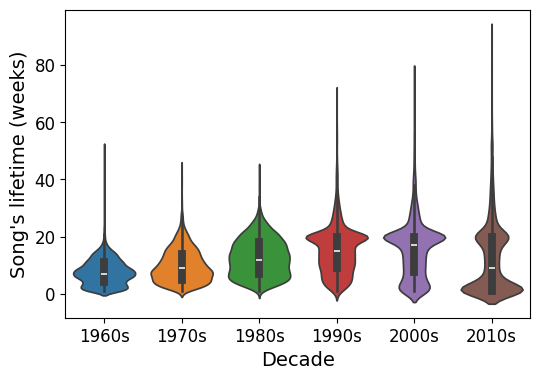

In [14]:
plt.figure(figsize=(6, 4))

billboard_hot_100_subset = billboard_hot_100[["artist", "song_name", "decade", "max_weeks_on_chart"]].drop_duplicates()
sns.violinplot(x='decade', y="max_weeks_on_chart", order=[str(decade) + "s" for decade in [1960, 1970, 1980, 1990, 2000, 2010]], data=billboard_hot_100_subset,
               palette="tab10")

plt.xlabel("Decade")
plt.ylabel("Song's lifetime (weeks)")

# plt.savefig("figures/lifeftime_distribution_per_decade.pdf", format="pdf", bbox_inches='tight')
plt.show()

Observed stat: 0.8333562271062268
95% CI: (-0.25, 0.25)
Observed stat 0.8333562271062268 is outside the 95% CI (indicating significance).
Best r squared: 0.6604512371775977
P values: [6.39330198e-13 3.53684371e-16]


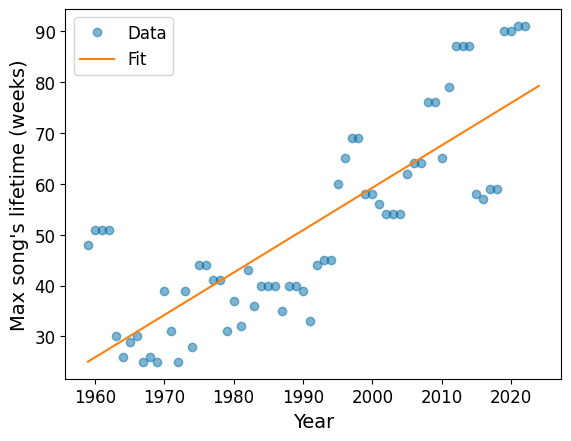

In [15]:
# plot max of max_weeks on the chart for each year and perform linear regression and get summary

max_weeks_on_chart_yearly = billboard_hot_100[["max_weeks_on_chart", "year"]].groupby(by="year").max()

x = max_weeks_on_chart_yearly.index.values
y = max_weeks_on_chart_yearly.values.flatten()

model = pwlf.PiecewiseLinFit(x, y)
breaks = model.fit(1)
r_squared_best = model.r_squared()
p_values_best = model.p_values(method="non-linear")
slope_best = model.slopes[0]

test_slopes = []

for i in range(1, 1001):
    # shuffle points and perform piecewise linear regression
    y_test = np.random.permutation(y) 
    model_test = pwlf.PiecewiseLinFit(x, y_test)
    model_test.fit(1)
    slopes = model_test.slopes
    test_slopes.append(slopes[0])

# Compute 95% confidence interval (CI) for the observed statistic
lower_percentile = 2.5
upper_percentile = 97.5

ci_lower = np.percentile(test_slopes, lower_percentile)
ci_upper = np.percentile(test_slopes, upper_percentile)

print(f"Observed stat: {slope_best}")
print(f"95% CI: ({ci_lower:.2f}, {ci_upper:.2f})")

if slope_best < ci_lower or slope_best > ci_upper:
    print(f"Observed stat {slope_best} is outside the 95% CI (indicating significance).")
else:
    print(f"Observed stat {slope_best} is inside the 95% CI.")

print(f"Best r squared: {r_squared_best}")
print(f"P values: {p_values_best}")

x_hat = np.linspace(1959, 2024, 100)
y_hat = model.predict(x_hat)

plt.ylabel("Max song's lifetime (weeks)")
plt.xlabel("Year")
plt.plot(x, y, 'o', label="Data", alpha=0.5)
plt.plot(x_hat, y_hat, label="Fit")
plt.legend()
plt.savefig("appendix/1.B.2.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show()


### Average weeks on the chart before and after reaching the top position

In [16]:
def get_past_weeks(row):
    top_position = row["top_position"].iloc[0]
    # take first day of the week when the song was in top position
    top_position_time = row[
        (row["position"] == top_position)]["first_day_of_the_week"].values[0]
    past_weeks = row[
        (row["first_day_of_the_week"] <= top_position_time)]["weeks_on_chart"].max()
    return past_weeks

df_past_weeks = billboard_hot_100.groupby(["artist", "song_name"]).apply(
    lambda row: get_past_weeks(row)).rename("past_weeks").reset_index()

billboard_hot_100 = billboard_hot_100.merge(df_past_weeks[["artist", "song_name", "past_weeks"]], on=["artist", "song_name"], how="left")

def get_future_weeks(row):
    top_position = row["top_position"].iloc[0]
    past_weeks = row["past_weeks"].iloc[0]
    # take first day of the week when the song was in top position
    top_position_time = row[
        (row["position"] == top_position)]["first_day_of_the_week"].values[0]
    max_weeks = row[
        (row["first_day_of_the_week"] > top_position_time)]["weeks_on_chart"].max()
    if max_weeks is np.nan or max_weeks == 0:
        return 0
    future_weeks = max_weeks - past_weeks
    if future_weeks is np.nan or future_weeks < 0:
        return 0
    return future_weeks

df_future_weeks = billboard_hot_100.groupby(["artist", "song_name"]).apply(
    lambda row: get_future_weeks(row)).rename("future_weeks").reset_index()

billboard_hot_100 = billboard_hot_100.merge(df_future_weeks[["artist", "song_name", "future_weeks"]], on=["artist", "song_name"], how="left")

C:\Users\cutie\AppData\Local\Temp\ipykernel_12504\3322084532.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_past_weeks = billboard_hot_100.groupby(["artist", "song_name"]).apply(
C:\Users\cutie\AppData\Local\Temp\ipykernel_12504\3322084532.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_future_weeks = billboard_hot_100.groupby(["artist", "song_name"]).apply(


C:\Users\cutie\AppData\Local\Temp\ipykernel_12504\2135012171.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  top_positions_max = pd.concat([top_positions_max, new_row_max])
C:\Users\cutie\AppData\Local\Temp\ipykernel_12504\2135012171.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  top_positions_future = pd.concat([top_positions_future, new_row_future])
C:\Users\cutie\AppData\Local\Temp\ipykernel_12504\2135012171.py:38: FutureWarning: The behavior of DataFrame concatenation with empty o

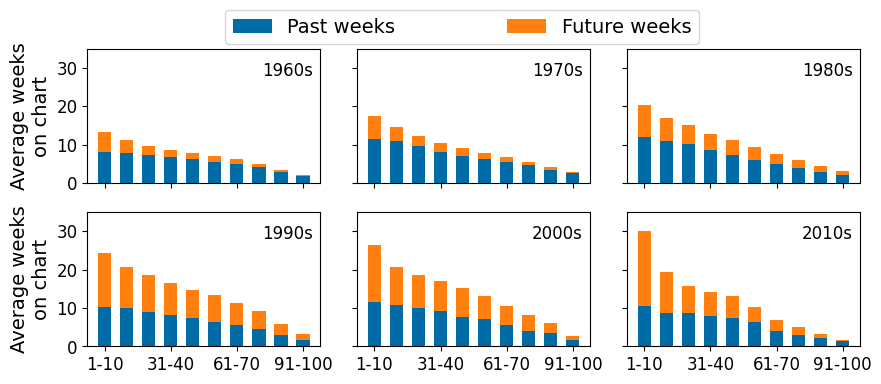

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(9, 4), sharey=True, sharex=True)

col_i = 0
row_i = 0

for year in range(1960, 2020, 10):
    # songs from other decades
    songs_from_other_decades = billboard_hot_100[(billboard_hot_100["year"] < year) |\
        (billboard_hot_100["year"] >= year + 10)][["artist", "song_name"]]

    # take songs only from this decade
    songs_in_decade = billboard_hot_100[~(billboard_hot_100["artist"].isin(songs_from_other_decades["artist"]) &\
            billboard_hot_100["song_name"].isin(songs_from_other_decades["song_name"]))]
    
    top_positions_max = pd.DataFrame(columns=["top_positions_range", "avg_weeks"])
    top_positions_future = pd.DataFrame(columns=["top_positions_range", "avg_weeks"])
    top_positions_past = pd.DataFrame(columns=["top_positions_range", "avg_weeks"])
    for top_position in range(10, 110, 10):
        avg_max_weeks = songs_in_decade[(songs_in_decade["top_position"] <= top_position) &\
            (songs_in_decade["top_position"] > top_position - 10)].groupby(
                ["artist", "song_name"])["max_weeks_on_chart"].first().mean()
        new_row_max = pd.DataFrame({"top_positions_range": f"{top_position - 9}-{top_position}",
            "avg_weeks": avg_max_weeks}, index=[0])
        top_positions_max = pd.concat([top_positions_max, new_row_max])

        avg_future_weeks = songs_in_decade[(songs_in_decade["top_position"] <= top_position) &\
            (songs_in_decade["top_position"] > top_position - 10)].groupby(
                ["artist", "song_name"])["future_weeks"].first().mean()
        new_row_future = pd.DataFrame({"top_positions_range": f"{top_position - 9}-{top_position}",
            "avg_weeks": avg_future_weeks}, index=[0])
        top_positions_future = pd.concat([top_positions_future, new_row_future])

        avg_past_weeks = songs_in_decade[(songs_in_decade["top_position"] <= top_position) &\
            (songs_in_decade["top_position"] > top_position - 10)].groupby(
                ["artist", "song_name"])["past_weeks"].first().mean()
        new_row_past = pd.DataFrame({"top_positions_range": f"{top_position - 9}-{top_position}",
            "avg_weeks": avg_past_weeks}, index=[0])
        top_positions_past = pd.concat([top_positions_past, new_row_past])

    ind = np.arange(top_positions_max["top_positions_range"].shape[0])
    # bar_width = 0.24
    bar_width = 0.6
    ax = axes[row_i, col_i]
    ax.bar(ind + bar_width, top_positions_past["avg_weeks"], bar_width, label="Past weeks")
    ax.bar(ind + bar_width, top_positions_future["avg_weeks"], bar_width, label="Future weeks",
           bottom=top_positions_past["avg_weeks"])
    ax.text(0.75, 0.8, f"{year}s", transform=ax.transAxes)
    ax.set_ylim([0, 21])
    if col_i >= 3:
        ax.set_xlabel("Top positions range")
    if col_i % 3 == 0:
        ax.set_ylabel("Average weeks\non chart")
    ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    ax.set_xticks(ind[::3] + bar_width, top_positions_max["top_positions_range"].tolist()[::3])

    if col_i == 0 and row_i == 0:
        ax.legend(fontsize=14, loc="lower left", bbox_to_anchor=(0.55, 0.96, 2.12, 0.2), ncols=3, mode="expand")

    # if col_i != 0 and col_i != 3:
    #    ax.set_yticks([])
    #    ax.set_yticks([], minor=True)
    #    ax.yaxis.set_tick_params(labelbottom=False)

    col_i += 1

    if col_i == 3:
        row_i += 1
        col_i = 0


plt.ylim([0, 35])
plt.tight_layout()
plt.show()

In [18]:
top_positions_future = pd.DataFrame(columns=["top_positions_range", "avg_weeks", "year"])
top_positions_past = pd.DataFrame(columns=["top_positions_range", "avg_weeks", "year"])
from scipy.stats import ks_2samp

for year in range(1990, 2020):
    # songs from other decades
    songs_from_other_years = billboard_hot_100[(billboard_hot_100["year"] != year)][["artist", "song_name"]]

    # take songs only from this year
    songs_in_decade = billboard_hot_100[~(billboard_hot_100["artist"].isin(songs_from_other_years["artist"]) &\
            billboard_hot_100["song_name"].isin(songs_from_other_years["song_name"]))]
    
    for top_position in range(10, 110, 10):
        avg_future_weeks = songs_in_decade[(songs_in_decade["top_position"] <= top_position) &\
            (songs_in_decade["top_position"] > top_position - 10)].groupby(
                ["artist", "song_name"])["future_weeks"].first().mean()
        new_row_future = pd.DataFrame({"top_positions_range": f"{top_position - 9}-{top_position}",
            "avg_weeks": avg_future_weeks, "year": year}, index=[0])
        top_positions_future = pd.concat([top_positions_future, new_row_future])

        avg_past_weeks = songs_in_decade[(songs_in_decade["top_position"] <= top_position) &\
            (songs_in_decade["top_position"] > top_position - 10)].groupby(
                ["artist", "song_name"])["past_weeks"].first().mean()
        new_row_past = pd.DataFrame({"top_positions_range": f"{top_position - 9}-{top_position}",
            "avg_weeks": avg_past_weeks, "year": year}, index=[0])
        top_positions_past = pd.concat([top_positions_past, new_row_past])

from scipy.stats import wilcoxon
import scipy.stats as stats

for top_position in range(10, 110, 10):
    past_weeks = top_positions_past[top_positions_past["top_positions_range"] == f"{top_position - 9}-{top_position}"]["avg_weeks"].values
    future_weeks = top_positions_future[top_positions_future["top_positions_range"] == f"{top_position - 9}-{top_position}"]["avg_weeks"].values
    
    differences = [b - a for b, a in zip(past_weeks, future_weeks)]
    print(np.mean(past_weeks) - np.mean(future_weeks))
    stat, p_value = wilcoxon(differences)

    print(f"P-value for {top_position - 9}-{top_position}: {p_value}")

C:\Users\cutie\AppData\Local\Temp\ipykernel_12504\2905829617.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  top_positions_future = pd.concat([top_positions_future, new_row_future])
C:\Users\cutie\AppData\Local\Temp\ipykernel_12504\2905829617.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  top_positions_past = pd.concat([top_positions_past, new_row_past])


-5.254023178250419
P-value for 1-10: 5.718320608139038e-07
-1.6026181848181817
P-value for 11-20: 0.019660815596580505
0.14547208109514465
P-value for 21-30: 0.39305018074810505
0.6044837959560674
P-value for 31-40: 0.049710121005773544
0.9000207050980862
P-value for 41-50: 0.03098480962216854
1.1449335228116464
P-value for 51-60: 0.00976695703879183
0.48542981415918085
P-value for 61-70: 0.06989291124045849
0.2751107262256691
P-value for 71-80: 0.11907656863331795
0.7348203341785453
P-value for 81-90: 6.516831030736041e-06
0.6590731267221451
P-value for 91-100: 8.326023817062378e-07


In [19]:
wo_top_10_future = billboard_hot_100[(billboard_hot_100["top_position"] > 10) &\
                                     (billboard_hot_100["year"] < 1990)].groupby(["year"])["future_weeks"].mean()
wo_top_10_past = billboard_hot_100[billboard_hot_100["top_position"] > 10 &\
                                     (billboard_hot_100["year"] < 1990)].groupby(["year"])["past_weeks"].mean()

wo_top_10 = (wo_top_10_past - wo_top_10_future).dropna()
sum_wo_top_10 = np.sum(np.sign(wo_top_10))

top_10_future = billboard_hot_100[(billboard_hot_100["top_position"] <= 10) &\
                                     (billboard_hot_100["year"] < 1990)].groupby(["year"])["future_weeks"].mean()
top_10_past = billboard_hot_100[(billboard_hot_100["top_position"] <= 10) &\
                                     (billboard_hot_100["year"] < 1990)].groupby(["year"])["past_weeks"].mean()

top_10 = (top_10_past - top_10_future).dropna()
sum_top_10 = np.sum(np.sign(top_10))

sums_wo_top_10 = []
sums_top_10 = []

for i in range(1, 1001):
    # randomly flip signs
    signs = np.random.choice([-1, 1], size=len(wo_top_10))
    permutated_wo_top_10 = np.sum(np.sign(wo_top_10) * signs)
    signs = np.random.choice([-1, 1], size=len(top_10))
    permutated_top_10 = np.sum(np.sign(top_10) * signs)

    sums_wo_top_10.append(np.sum(permutated_wo_top_10))
    sums_top_10.append(np.sum(permutated_top_10))

# Compute 95% confidence interval (CI) for the observed statistic
lower_percentile = 2.5
upper_percentile = 97.5

ci_lower_wo_top_10 = np.percentile(sums_wo_top_10, lower_percentile)
ci_upper_wo_top_10 = np.percentile(sums_wo_top_10, upper_percentile)

ci_lower_top_10 = np.percentile(sums_top_10, lower_percentile)
ci_upper_top_10 = np.percentile(sums_top_10, upper_percentile)

print(f"Observed stat without top 10: {sum_wo_top_10}")
print(f"95% CI without top 10: ({ci_lower_wo_top_10:.2f}, {ci_upper_wo_top_10:.2f})")

print(f"Observed stat with top 10: {sum_top_10}")
print(f"95% CI with top 10: ({ci_lower_top_10:.2f}, {ci_upper_top_10:.2f})")

if np.mean(np.abs(sums_wo_top_10) >= np.abs(sum_wo_top_10)) < 0.05:
    print(f"Observed stat {sum_wo_top_10} is outside the 95% CI (indicating significance).")
else:
    print(f"Observed stat {sum_wo_top_10} is inside the 95% CI.")

if np.mean(np.abs(sums_top_10) >= np.abs(sum_top_10)) < 0.05:
    print(f"Observed stat {sum_top_10} is outside the 95% CI (indicating significance).")
else:
    print(f"Observed stat {sum_top_10} is inside the 95% CI.")

Observed stat without top 10: 31.0
95% CI without top 10: (-11.00, 11.00)
Observed stat with top 10: 31.0
95% CI with top 10: (-11.00, 11.00)
Observed stat 31.0 is outside the 95% CI (indicating significance).
Observed stat 31.0 is outside the 95% CI (indicating significance).


Observed stat without top 10: -0.059442828341456096
95% CI without top 10: (-0.0590, 0.0554)
Observed stat with top 10: 0.3048756797657607
95% CI with top 10: (-0.1630, 0.1699)
Observed stat -0.059442828341456096 is outside the 95% CI (indicating significance).
Observed stat 0.3048756797657607 is outside the 95% CI (indicating significance).
R squared without top 10: 0.11506011417233175
R squared with top 10: 0.4286451104644784
P values without top 10: [0.84156564 0.05346556]
P values with top 10: [1.49877796e-01 3.56963267e-05]


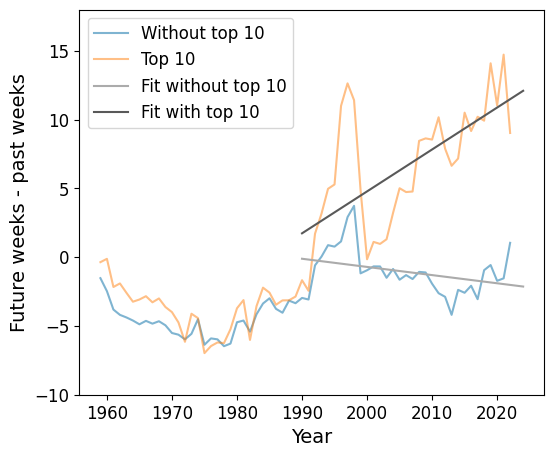

In [20]:
wo_top_10_future = billboard_hot_100[billboard_hot_100["top_position"] > 10].groupby(["year"])["future_weeks"].mean()
wo_top_10_past = billboard_hot_100[billboard_hot_100["top_position"] > 10].groupby(["year"])["past_weeks"].mean()

wo_top_10 = (wo_top_10_future - wo_top_10_past)
wo_top_10.plot(kind='line', figsize=(6, 5), label="Without top 10", alpha=0.5)

top_10_future = billboard_hot_100[billboard_hot_100["top_position"] <= 10].groupby(["year"])["future_weeks"].mean()
top_10_past = billboard_hot_100[billboard_hot_100["top_position"] <= 10].groupby(["year"])["past_weeks"].mean()

top_10 = (top_10_future - top_10_past)
top_10.plot(kind='line', figsize=(6, 5), label="Top 10", alpha=0.5)

wo_top_10 = wo_top_10[wo_top_10.index >= 1990]
top_10 = top_10[top_10.index >= 1990]
model_wo_top_10 = pwlf.PiecewiseLinFit(wo_top_10.index.values, wo_top_10.values)
model_wo_top_10.fit(1)
model_top_10 = pwlf.PiecewiseLinFit(top_10.index.values, top_10.values)
model_top_10.fit(1)

slopes_wo_top_10 = []
slopes_top_10 = []

for i in range(1, 1001):
    # shuffle points and perform piecewise linear regression
    y_test_wo_top_10 = np.random.permutation(wo_top_10.values) 
    y_test_top_10 = np.random.permutation(top_10.values) 
    model_test_wo_top_10 = pwlf.PiecewiseLinFit(wo_top_10.index.values, y_test_wo_top_10)
    model_test_wo_top_10.fit(1)
    model_test_top_10 = pwlf.PiecewiseLinFit(top_10.index.values, y_test_top_10)
    model_test_top_10.fit(1)
    slopes_wo_top_10.append(model_test_wo_top_10.slopes[0])
    slopes_top_10.append(model_test_top_10.slopes[0])

# Compute 95% confidence interval (CI) for the observed statistic
lower_percentile = 2.5
upper_percentile = 97.5

ci_lower_wo_top_10 = np.percentile(slopes_wo_top_10, lower_percentile)
ci_upper_wo_top_10 = np.percentile(slopes_wo_top_10, upper_percentile)

ci_lower_top_10 = np.percentile(slopes_top_10, lower_percentile)
ci_upper_top_10 = np.percentile(slopes_top_10, upper_percentile)

print(f"Observed stat without top 10: {model_wo_top_10.slopes[0]}")
print(f"95% CI without top 10: ({ci_lower_wo_top_10:.4f}, {ci_upper_wo_top_10:.4f})")

print(f"Observed stat with top 10: {model_top_10.slopes[0]}")
print(f"95% CI with top 10: ({ci_lower_top_10:.4f}, {ci_upper_top_10:.4f})")

if model_wo_top_10.slopes[0] < ci_lower_wo_top_10 or model_wo_top_10.slopes[0] > ci_upper_wo_top_10:
    print(f"Observed stat {model_wo_top_10.slopes[0]} is outside the 95% CI (indicating significance).")
else:
    print(f"Observed stat {model_wo_top_10.slopes[0]} is inside the 95% CI.")

if model_top_10.slopes[0] < ci_lower_top_10 or model_top_10.slopes[0] > ci_upper_top_10:
    print(f"Observed stat {model_top_10.slopes[0]} is outside the 95% CI (indicating significance).")
else:
    print(f"Observed stat {model_top_10.slopes[0]} is inside the 95% CI.")

x_hat = np.linspace(1990, 2024, 100)
y_hat_wo_top_10 = model_wo_top_10.predict(x_hat)
y_hat_top_10 = model_top_10.predict(x_hat)

plt.plot(x_hat, y_hat_wo_top_10, label="Fit without top 10")
plt.plot(x_hat, y_hat_top_10, label="Fit with top 10")

print (f"R squared without top 10: {model_wo_top_10.r_squared()}")
print (f"R squared with top 10: {model_top_10.r_squared()}")
print(f"P values without top 10: {model_wo_top_10.p_values(method="non-linear")}")
print(f"P values with top 10: {model_top_10.p_values(method="non-linear")}")
plt.legend(loc="upper left")
plt.ylabel("Future weeks - past weeks")
plt.xlabel("Year")
plt.ylim([-10, 18])
plt.savefig("appendix/1.C.3.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show()

### Plot all together

C:\Users\cutie\AppData\Local\Temp\ipykernel_12504\667073015.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='decade', y="max_weeks_on_chart", order=[str(decade) + 's' for decade in range(1960, 2020, 10)], data=billboard_hot_100_subset_B, ax=ax,
C:\Users\cutie\AppData\Local\Temp\ipykernel_12504\667073015.py:81: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  top_positions_max = pd.concat([top_positions_max, new_row_max])
C:\Users\cutie\AppData\Local\Temp\ipykernel_12504\667073015.py:88: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. I

[{'segment': 1, 'observed_slope': np.float64(-0.0013286042913524723), 'observed_intercept': np.float64(2.9245786843212698), 'slope_p_value': np.float64(0.0), 'slope_CI': (np.float64(-0.0006965724660465931), np.float64(0.0006918409921955232))}, {'segment': 2, 'observed_slope': np.float64(0.017521872488795453), 'observed_intercept': np.float64(-34.81367976907165), 'slope_p_value': np.float64(0.0), 'slope_CI': (np.float64(-0.008144110390423119), np.float64(0.008227251575380382))}]


C:\Users\cutie\AppData\Local\Temp\ipykernel_12504\667073015.py:188: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  plt.savefig("fig1.jpg", format="jpg", bbox_inches='tight', dpi=300)
C:\Users\cutie\AppData\Local\Temp\ipykernel_12504\667073015.py:188: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  plt.savefig("fig1.jpg", format="jpg", bbox_inches='tight', dpi=300)
C:\Users\cutie\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


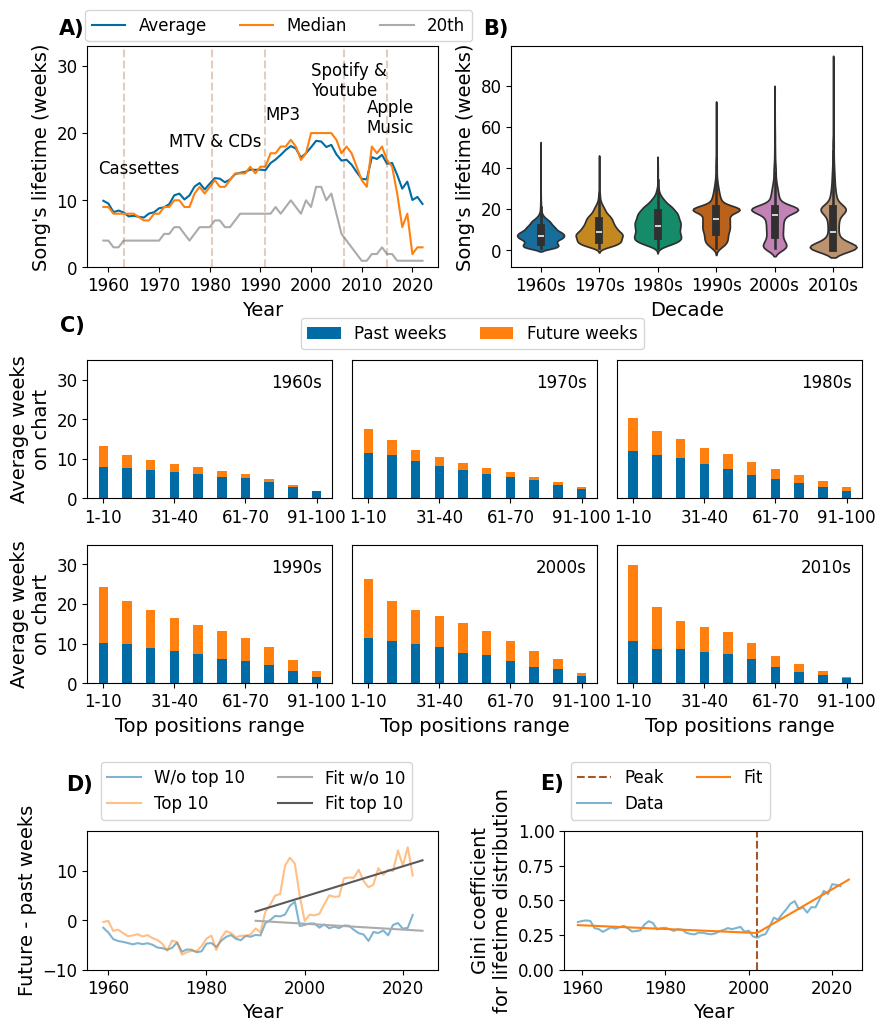

In [21]:
fig, axes = plt.subplot_mosaic([["A", "A", "A", "A", "A", "A", "A", ".", "B", "B", "B", "B", "B", "B", "B"],
                                [".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
                                ["C1", "C1", "C1", "C1", "C1", "C2", "C2", "C2", "C2", "C2", "C3", "C3", "C3", "C3", "C3"],
                                ["C4", "C4", "C4", "C4", "C4", "C5", "C5", "C5", "C5", "C5", "C6", "C6", "C6", "C6", "C6"],
                                [".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
                                ["D", "D", "D", "D", "D", "D", "D", ".", ".", "E", "E", "E", "E", "E", "E"]], figsize=(10, 12),
    gridspec_kw={'height_ratios': [1.6, 0.0001, 1, 1, 0.4, 1], 'width_ratios': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 'wspace': 0.6, 'hspace': 0.4}, constrained_layout=True)

# Plot A
ax = axes['A']

billboard_hot_100_subset_A = billboard_hot_100[["artist", "song_name", "year", "max_weeks_on_chart"]].drop_duplicates()
avg_week_on_chart_yearly = billboard_hot_100_subset_A[["max_weeks_on_chart", "year"]].groupby(by="year").mean()
std_error = billboard_hot_100_subset_A[["year", "max_weeks_on_chart"]].groupby(by="year").sem()

median_weeks_on_chart_yearly = billboard_hot_100_subset_A[["max_weeks_on_chart", "year"]].groupby(by="year").median()
median_std_error = billboard_hot_100_subset_A[["year", "max_weeks_on_chart"]].groupby(by="year")["max_weeks_on_chart"].apply(
    std_error_of_median).rename("max_weeks_on_chart")

twntieth_weeks_on_chart_yearly = billboard_hot_100_subset_A[["max_weeks_on_chart", "year"]].groupby(by="year").quantile(0.2)

avg_week_on_chart_yearly.plot(kind='line', legend=False, ax=ax)
median_weeks_on_chart_yearly.plot(kind='line', legend=False, ax=ax)
twntieth_weeks_on_chart_yearly.plot(kind='line', legend=False, ax=ax)

ax.axvline(x = youtube_creation_date.year + ((spotify_creation_date.year - youtube_creation_date.year)/2),
                                color=brown, ls="dashed", alpha=0.3)
ax.axvline(x = apple_music_creation_date.year, color=brown, ls="dashed", alpha=0.3)
ax.axvline(x = mtv_launch_date.year + ((mtv_launch_date.year - cds_creation_date.year)/2), color=brown,
                                ls="dashed", alpha=0.3)
ax.axvline(x = mp3_creation_date.year, color=brown, ls="dashed", alpha=0.3)
ax.axvline(x = cassettes_creation_date.year, color=brown, ls="dashed", alpha=0.3)

ax.text(youtube_creation_date.year - 5, 25.5, "Spotify &\nYoutube")
ax.text(apple_music_creation_date.year - 4, 20, "Apple\nMusic")
ax.text(mtv_launch_date.year - 9, 18, "MTV & CDs")
ax.text(mp3_creation_date.year, 22, "MP3")
ax.text(cassettes_creation_date.year - 5, 14, "Cassettes")

ax.set_xlabel("Year")
ax.set_ylabel("Song's lifetime (weeks)")
ax.legend(["Average", "Median", "20th"], loc="upper left", ncol=3, bbox_to_anchor=(-0.03, 1.2))
ax.set_ylim([0, 33])
ax.text(-0.08, 1.05, 'A)', transform=ax.transAxes, weight='bold', fontsize=15)

# Plot B
ax = axes['B']

billboard_hot_100_subset_B = billboard_hot_100[["artist", "song_name", "decade", "max_weeks_on_chart"]].drop_duplicates()
sns.violinplot(x='decade', y="max_weeks_on_chart", order=[str(decade) + 's' for decade in range(1960, 2020, 10)], data=billboard_hot_100_subset_B, ax=ax,
               palette="colorblind")

ax.set_xlabel("Decade")
ax.set_ylabel("Song's lifetime (weeks)")
ax.text(-0.08, 1.05, 'B)', transform=ax.transAxes, weight='bold', fontsize=15)

# Plot C
col_i = 0

for year in range(1960, 2020, 10):
    ax = axes[f'C{col_i + 1}']
    
    # songs from other decades
    songs_from_other_decades = billboard_hot_100[(billboard_hot_100["year"] < year) |\
        (billboard_hot_100["year"] >= year + 10)][["artist", "song_name"]]

    # take songs only from this decade
    songs_in_decade = billboard_hot_100[~(billboard_hot_100["artist"].isin(songs_from_other_decades["artist"]) &\
            billboard_hot_100["song_name"].isin(songs_from_other_decades["song_name"]))]
    
    top_positions_max = pd.DataFrame(columns=["top_positions_range", "avg_weeks"])
    top_positions_future = pd.DataFrame(columns=["top_positions_range", "avg_weeks"])
    top_positions_past = pd.DataFrame(columns=["top_positions_range", "avg_weeks"])
    for top_position in range(10, 110, 10):
        avg_max_weeks = songs_in_decade[(songs_in_decade["top_position"] <= top_position) &\
            (songs_in_decade["top_position"] > top_position - 10)].groupby(
                ["artist", "song_name"])["max_weeks_on_chart"].first().mean()
        new_row_max = pd.DataFrame({"top_positions_range": f"{top_position - 9}-{top_position}",
            "avg_weeks": avg_max_weeks}, index=[0])
        top_positions_max = pd.concat([top_positions_max, new_row_max])

        avg_future_weeks = songs_in_decade[(songs_in_decade["top_position"] <= top_position) &\
            (songs_in_decade["top_position"] > top_position - 10)].groupby(
                ["artist", "song_name"])["future_weeks"].first().mean()
        new_row_future = pd.DataFrame({"top_positions_range": f"{top_position - 9}-{top_position}",
            "avg_weeks": avg_future_weeks}, index=[0])
        top_positions_future = pd.concat([top_positions_future, new_row_future])

        avg_past_weeks = songs_in_decade[(songs_in_decade["top_position"] <= top_position) &\
            (songs_in_decade["top_position"] > top_position - 10)].groupby(
                ["artist", "song_name"])["past_weeks"].first().mean()
        new_row_past = pd.DataFrame({"top_positions_range": f"{top_position - 9}-{top_position}",
            "avg_weeks": avg_past_weeks}, index=[0])
        top_positions_past = pd.concat([top_positions_past, new_row_past])

    ind = np.arange(top_positions_max["top_positions_range"].shape[0])
    # bar_width = 0.24
    bar_width = 0.4
    ax.bar(ind + bar_width, top_positions_past["avg_weeks"], bar_width, label="Past weeks")
    ax.bar(ind + bar_width, top_positions_future["avg_weeks"], bar_width, label="Future weeks",
           bottom=top_positions_past["avg_weeks"])
    ax.text(0.75, 0.8, f"{year}s", transform=ax.transAxes)
    ax.set_ylim([0, 35])
    if col_i >= 3:
        ax.set_xlabel("Top positions range")
    if col_i % 3 == 0:
        ax.set_ylabel("Average weeks\non chart")
    ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    ax.set_xticks(ind[::3] + bar_width, top_positions_max["top_positions_range"].tolist()[::3])
    if col_i != 0 and col_i != 3:
        ax.set_yticks([])
        ax.set_yticks([], minor=True)
        ax.yaxis.set_tick_params(labelbottom=False)

    # if col_i == 2:
    #     ax.legend(bbox_to_anchor=(1, 1.2), ncol=2)

    col_i += 1

lines_labels = [ax.get_legend_handles_labels() for ax in [axes["C1"]]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
legend_bbox = (0.46, 0.59, 0.1, 0.1)
fig.legend(lines, labels, ncol=2, loc='center', bbox_to_anchor=legend_bbox, bbox_transform=fig.transFigure)

axes['C1'].text(-0.11, 1.2, 'C)', transform=axes["C1"].transAxes, weight='bold', fontsize=15)

# Plot D

ax = axes['D']

wo_top_10_future = billboard_hot_100[billboard_hot_100["top_position"] > 10].groupby(["year"])["future_weeks"].mean()
wo_top_10_past = billboard_hot_100[billboard_hot_100["top_position"] > 10].groupby(["year"])["past_weeks"].mean()

wo_top_10 = (wo_top_10_future - wo_top_10_past)
wo_top_10.plot(kind='line', label="W/o top 10", alpha=0.5, ax=ax)

top_10_future = billboard_hot_100[billboard_hot_100["top_position"] <= 10].groupby(["year"])["future_weeks"].mean()
top_10_past = billboard_hot_100[billboard_hot_100["top_position"] <= 10].groupby(["year"])["past_weeks"].mean()

top_10 = (top_10_future - top_10_past)
top_10.plot(kind='line', label="Top 10", alpha=0.5, ax=ax)

x_hat = np.linspace(1990, 2024, 100)
y_hat_wo_top_10 = model_wo_top_10.predict(x_hat)
y_hat_top_10 = model_top_10.predict(x_hat)

ax.plot(x_hat, y_hat_wo_top_10, label="Fit w/o 10")
ax.plot(x_hat, y_hat_top_10, label="Fit top 10")

legend_bbox = (0.13, 0.19, 0.1, 0.1)
ax.legend(loc="upper left", ncol=2, bbox_to_anchor=legend_bbox, bbox_transform=fig.transFigure)
ax.set_ylabel("Future - past weeks")
ax.set_xlabel("Year")
ax.set_ylim([-10, 18])

axes['D'].text(-0.06, 1.29, 'D)', transform=axes["D"].transAxes, weight='bold', fontsize=15)

# Plot E

ax = axes["E"]

billboard_hot_100_subset = billboard_hot_100[["artist", "song_name", "year", "max_weeks_on_chart"]].drop_duplicates()
gini_coefficient_yearly = billboard_hot_100_subset[["max_weeks_on_chart", "year"]].groupby(by="year")["max_weeks_on_chart"].apply(gini_coefficient)

model = pwlf.PiecewiseLinFit(gini_coefficient_yearly.index.values, gini_coefficient_yearly.values.flatten())
breaks = model.fit(2)
x_hat = np.linspace(1959, 2024, 100)
y_hat = model.predict(x_hat)

print(test_segments(gini_coefficient_yearly.index.values, gini_coefficient_yearly.values.flatten(),
                    [breaks[1]], model.slopes, model.intercepts))

# plot vline break year
ax.axvline(x=breaks[1], linestyle='--', color=brown, label="Peak")

gini_coefficient_yearly.plot(kind='line', label="Data", alpha=0.5)
ax.plot(x_hat, y_hat, '-', label="Fit")

ax.set_xlabel("Year")
ax.set_ylabel("Gini coefficient\nfor lifetime distribution")
ax.set_ylim([0, 1])
legend_bbox = (0.6, 0.19, 0.1, 0.1)
ax.legend(loc="upper left", ncol=2, bbox_to_anchor=legend_bbox, bbox_transform=fig.transFigure)

ax.text(-0.08, 1.3, 'E)', transform=ax.transAxes, weight='bold', fontsize=15)

plt.savefig("fig1.jpg", format="jpg", bbox_inches='tight', dpi=300)
plt.show()

## Song trajectories

### Average trajectories per decade

In [22]:
import dateutil.parser

rows_to_add = []

for year in range(1960, 2020, 10):
    # songs from other decades
    songs_from_other_decades = billboard_hot_100[(billboard_hot_100["year"] < year) |\
        (billboard_hot_100["year"] >= year + 10)][["artist", "song_name"]]
    
    songs_in_decade = billboard_hot_100[(billboard_hot_100["year"] >= year) &\
        (billboard_hot_100["year"] < year + 10) & ~((billboard_hot_100["artist"].isin(songs_from_other_decades["artist"]) &\
            billboard_hot_100["song_name"].isin(songs_from_other_decades["song_name"])))][["artist", "song_name", "weeks_on_chart",
                "position", "first_day_of_the_week", "year", "top_position"]]
    grouped = songs_in_decade.groupby(["artist", "song_name"])

    min_first_week = songs_in_decade["first_day_of_the_week"].min().to_pydatetime()

    for name, group in grouped:
        max_week = group["first_day_of_the_week"].max().to_pydatetime()

        for row_index, row in group.iterrows():
            if row["first_day_of_the_week"] == max_week:
                week_date = row["first_day_of_the_week"] + timedelta(weeks=1)

                while week_date < dateutil.parser.parse(f"{year + 9}-12-31"):
                    rows_to_add.append({
                        "artist": row["artist"],
                        "song_name": row["song_name"],
                        "weeks_on_chart": row["weeks_on_chart"],
                        "position": 101,
                        "first_day_of_the_week": week_date,
                        "year": week_date.year,
                        "top_position": row["top_position"]
                    })
                    week_date += timedelta(weeks=1)

billboard_100_with_empty_weeks = pd.concat([billboard_hot_100[["artist", "song_name",
    "weeks_on_chart", "position", "first_day_of_the_week", "year", "top_position"]], pd.DataFrame(rows_to_add)], ignore_index=True)

billboard_100_with_empty_weeks["first_week"] = billboard_100_with_empty_weeks.groupby(["artist", "song_name"])["first_day_of_the_week"].transform("min")

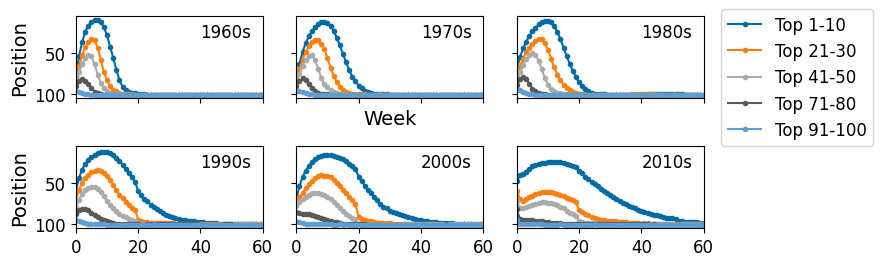

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(9, 3), sharey=True, sharex=True)

row_i = 0
col_i = 0

for year in [1960, 1970, 1980, 1990, 2000, 2010]:
    # all songs in the decade
    all_songs_in_decade = billboard_100_with_empty_weeks[(billboard_100_with_empty_weeks["year"] >= year) &\
        (billboard_100_with_empty_weeks["year"] < year + 10)][["artist", "song_name", "first_day_of_the_week", "top_position", "position",
            "first_week"]]

    # songs from other decades
    songs_from_other_decades = billboard_hot_100[(billboard_hot_100["year"] < year) |\
        (billboard_hot_100["year"] >= year + 10)][["artist", "song_name"]]

    for top_position, low_positions in [(1, 10),  (21, 30), (41, 50), (71, 80), (91, 100)]:
        # songs that reached top 50 in the decade
        top_x_positions_in_decade = all_songs_in_decade[(all_songs_in_decade["top_position"] <= low_positions) &\
            (all_songs_in_decade["top_position"] >= top_position)][["artist", "song_name"]]

        # take songs only from this decade
        top_x_positions_in_decade = top_x_positions_in_decade[~(top_x_positions_in_decade["artist"].isin(songs_from_other_decades["artist"]) &\
            top_x_positions_in_decade["song_name"].isin(songs_from_other_decades["song_name"]))]

        # take all positions of the songs
        top_x_positions_in_decade = top_x_positions_in_decade[["artist", "song_name"]].drop_duplicates().merge(
            billboard_100_with_empty_weeks[["artist", "song_name",
                "position", "first_day_of_the_week", "first_week"]], on=["artist", "song_name"], how="left")

        min_first_week = top_x_positions_in_decade["first_day_of_the_week"].min().to_pydatetime()

        top_x_positions_in_decade["first_day_of_the_week"] = top_x_positions_in_decade.apply(lambda row:
            int(((min_first_week + timedelta(
                    days=(row["first_day_of_the_week"] - row["first_week"]).days)) - min_first_week).days / 7), axis=1)

        top_x_positions_in_decade.set_index("first_day_of_the_week", inplace=True)
        top_x_positions_in_decade.sort_index(inplace=True)

        axes[row_i, col_i].plot(top_x_positions_in_decade.groupby("first_day_of_the_week")["position"].mean(),
            marker='o', label=f"Top {top_position}-{low_positions}", ms=3)

    axes[row_i, col_i].text(40, 30, f"{year}s")
    if row_i == 0 and col_i == 1:
        axes[row_i, col_i].set_xlabel("Week")
    if col_i == 0:
        axes[row_i, col_i].set_ylabel("Position")
    if row_i == 1 and col_i == 2:
        axes[row_i, col_i].legend(bbox_to_anchor=(1.05, 0.9))
    axes[row_i, col_i].set_xlim([0, 60])

    col_i += 1
    if col_i == 3:
        col_i = 0
        row_i += 1

fig.tight_layout()
plt.gca().invert_yaxis()
plt.show()

  0%|          | 0/6 [00:00<?, ?it/s]C:\Users\cutie\AppData\Local\Temp\ipykernel_12504\4110406244.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_data = pd.concat([model_data, pd.DataFrame({"decade": f"{year}s", "top_position": f"Top {top_position}-{low_positions}",
100%|██████████| 6/6 [00:15<00:00,  2.57s/it]
C:\Users\cutie\AppData\Local\Temp\ipykernel_12504\4110406244.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row_i, col_i].set_xticklabels(labels)
100%|██████████| 6/6 [00:16<00:00,  2.80s/it]


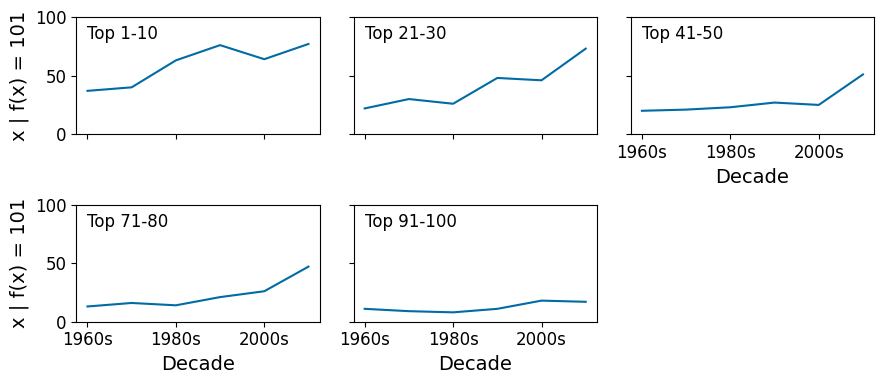

In [24]:
from tqdm import tqdm
from scipy import interpolate
from scipy.stats import spearmanr

fig, axes = plt.subplots(2, 3, figsize=(9, 4), sharey=True, sharex=True)

row_i = 0
col_i = 0
models = []
model_data = pd.DataFrame(columns=["decade", "top_position", "width"])
spearman_correlations = []

for top_position, low_positions in [(1, 10),  (21, 30), (41, 50), (71, 80), (91, 100)]:
    areas = []
    # songs that reached top 50 in the decade
    top_x_positions = billboard_100_with_empty_weeks[(billboard_100_with_empty_weeks["top_position"] <= low_positions) &\
        (billboard_100_with_empty_weeks["top_position"] >= top_position)][["artist", "song_name",
            "first_day_of_the_week", "top_position", "position", "first_week", "year"]]

    for year in tqdm([1960, 1970, 1980, 1990, 2000, 2010]):
        songs_from_decade = top_x_positions[(top_x_positions["year"] >= year) &\
        (top_x_positions["year"] < year + 10)][["artist", "song_name"]]

        songs_from_other_decades = billboard_hot_100[(billboard_hot_100["year"] < year) |\
            (billboard_hot_100["year"] >= year + 10)][["artist", "song_name"]]

        top_x_positions_in_decade = top_x_positions[(top_x_positions["top_position"] <= low_positions) &\
            (top_x_positions["top_position"] >= top_position)][["artist", "song_name"]]

        top_x_positions_in_decade = top_x_positions_in_decade[~(top_x_positions_in_decade["artist"].isin(songs_from_other_decades["artist"]) &\
            top_x_positions_in_decade["song_name"].isin(songs_from_other_decades["song_name"]))]

        top_x_positions_in_decade = top_x_positions_in_decade[["artist", "song_name"]].drop_duplicates().merge(
            billboard_100_with_empty_weeks[["artist", "song_name",
                "position", "first_day_of_the_week", "first_week"]], on=["artist", "song_name"], how="left")

        min_first_week = top_x_positions_in_decade["first_day_of_the_week"].min().to_pydatetime()

        top_x_positions_in_decade["first_day_of_the_week"] = top_x_positions_in_decade.apply(lambda row:
            int(((min_first_week + timedelta(
                    days=(row["first_day_of_the_week"] - row["first_week"]).days)) - min_first_week).days / 7), axis=1)

        top_x_positions_in_decade.set_index("first_day_of_the_week", inplace=True)
        top_x_positions_in_decade.sort_index(inplace=True)

        avg_traj = top_x_positions_in_decade.groupby("first_day_of_the_week")["position"].mean()
        x = avg_traj.index
        y = avg_traj.values
        f = interpolate.interp1d(y, x, bounds_error=False, fill_value="extrapolate")
        x_cross_101 = f(101)
        areas.append(x_cross_101)
        model_data = pd.concat([model_data, pd.DataFrame({"decade": f"{year}s", "top_position": f"Top {top_position}-{low_positions}",
            "width": x_cross_101}, index=[0])])

    model = pwlf.PiecewiseLinFit(range(1960, 2020, 10), areas)
    model.fit(1)
    models.append(model)
    spearman_correlations.append(spearmanr(range(1960, 2020, 10), areas).correlation)
    axes[row_i, col_i].plot(range(1960, 2020, 10), areas)
    axes[row_i, col_i].text(1960, 81, f"Top {top_position}-{low_positions}")
    if row_i == 1 and col_i == 0:
        labels = [item.get_text() + 's' for item in axes[row_i, col_i].get_xticklabels()]
        axes[row_i, col_i].set_xticklabels(labels)

    if row_i == 1 or ((row_i == 0) and (col_i == 2)):
        axes[row_i, col_i].set_xlabel("Decade")
        axes[row_i, col_i].xaxis.set_tick_params(labelbottom=True)
        axes[row_i, col_i].xaxis.set_major_locator(plt.MaxNLocator(3))
        for tk in axes[row_i, col_i].get_xticklabels():
            tk.set_visible(True)

    if col_i == 0:
        axes[row_i, col_i].set_ylabel("x | f(x) = 101")

    col_i += 1
    if col_i == 3:
        col_i = 0
        row_i += 1

plt.ylim(0, 100)
fig.tight_layout()
fig.delaxes(axes[1, 2])
plt.savefig("appendix/2.C.1.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show()

In [25]:
import itertools

shuffled_slopes = {"1-10": [], "21-30": [], "41-50": [], "71-80": [], "91-100": []}

for j, (top_position, low_positions) in enumerate([(1, 10),  (21, 30), (41, 50), (71, 80), (91, 100)]):
    areas = model_data[model_data["top_position"] == f"Top {top_position}-{low_positions}"]["width"].values
    all_permutations = itertools.permutations(areas)
    for y in all_permutations:
        model = pwlf.PiecewiseLinFit(range(1960, 2020, 10), areas)
        model.fit(1)
        correlation, p_value = spearmanr(range(1960, 2020, 10), y)
        shuffled_slopes[f"{top_position}-{low_positions}"].append(correlation)

# Compute 95% confidence intervals for each statistic
lower_percentile = 2.5
upper_percentile = 97.5

for j, (top_position, low_positions) in enumerate([(1, 10),  (21, 30), (41, 50), (71, 80), (91, 100)]):
    ci_lower = np.percentile(shuffled_slopes[f"{top_position}-{low_positions}"], lower_percentile)
    ci_upper = np.percentile(shuffled_slopes[f"{top_position}-{low_positions}"], upper_percentile)
    print(f"Top {top_position}-{low_positions}: {spearman_correlations[j]}")
    print(f"95% CI: ({ci_lower:.2f}, {ci_upper:.2f})")
    if spearman_correlations[j] < ci_lower or spearman_correlations[j] > ci_upper:
        print(f"Observed spearman correlation coeff {spearman_correlations[j]} was outside the 95% CI (indicating significance).")
    else:
        print(f"Observed spearman correlation coeff {spearman_correlations[j]} was inside the 95% CI.")

Top 1-10: 0.942857142857143
95% CI: (-0.83, 0.83)
Observed spearman correlation coeff 0.942857142857143 was outside the 95% CI (indicating significance).
Top 21-30: 0.8857142857142858
95% CI: (-0.83, 0.83)
Observed spearman correlation coeff 0.8857142857142858 was outside the 95% CI (indicating significance).
Top 41-50: 0.942857142857143
95% CI: (-0.83, 0.83)
Observed spearman correlation coeff 0.942857142857143 was outside the 95% CI (indicating significance).
Top 71-80: 0.942857142857143
95% CI: (-0.83, 0.83)
Observed spearman correlation coeff 0.942857142857143 was outside the 95% CI (indicating significance).
Top 91-100: 0.6377481392176932
95% CI: (-0.81, 0.81)
Observed spearman correlation coeff 0.6377481392176932 was inside the 95% CI.


### Archtypes

In [26]:
from tqdm import tqdm
from datetime import datetime, timedelta
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from pandas.plotting import table

In [27]:
billboard_hot_100["max_weeks_on_chart"] = billboard_hot_100.groupby(["artist", "song_name"])["weeks_on_chart"].transform("max")

billboard_hot_100["first_position"] = billboard_hot_100.sort_values(
    by="first_day_of_the_week").groupby(["artist", "song_name"])[["position", "first_day_of_the_week"]].transform("first")["position"]
billboard_hot_100["last_position"] = billboard_hot_100.sort_values(
    by="first_day_of_the_week").groupby(["artist", "song_name"])[["position", "first_day_of_the_week"]].transform("last")["position"]

billboard_hot_100_copy = billboard_hot_100.copy()
billboard_hot_100_ml = billboard_hot_100.groupby(
    ["artist", "song_name"])[["past_weeks", "top_position", "future_weeks", "max_weeks_on_chart", "year", "first_position", "last_position"]].first().reset_index()

In [28]:
features = ["past_weeks", "top_position", "future_weeks", "max_weeks_on_chart", "first_position", "last_position"]

In [29]:
scaler = StandardScaler()
X = scaler.fit_transform(billboard_hot_100_ml[features])

model = KMeans(n_clusters=5, n_init="auto", random_state=1)
model.fit(X)

y_clusters = model.predict(X)

billboard_hot_100_ml["cluster"] = y_clusters
billboard_hot_100_new = billboard_hot_100_ml[["artist", "song_name", "cluster"]].merge(billboard_hot_100_copy, on=["artist", "song_name"], how="left")

from numpy import unique

unique_clusters = unique(y_clusters)

In [30]:
# classify clusters
cluster_statistics = {}

for cluster in unique_clusters:
    songs_from_cluster = billboard_hot_100_new[billboard_hot_100_new['cluster'] == cluster].copy()
    cluster_statistics[cluster] = songs_from_cluster[["weeks_on_chart", "past_weeks", "future_weeks", "first_position", "last_position", "top_position"]].describe(
        percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9])

brief_cluster = np.argmin([cluster_statistics[i].loc['75%'].loc["weeks_on_chart"] for i in unique_clusters])
start_high_cluster = np.argmin([cluster_statistics[i].loc['75%'].loc["first_position"] for i in unique_clusters])
end_high_cluster = np.argmin([cluster_statistics[i].loc['75%'].loc["last_position"] + cluster_statistics[i].loc['75%'].loc["future_weeks"] for i in unique_clusters])
normal_cluster = np.argmax([cluster_statistics[i].loc['75%'].loc["last_position"] + cluster_statistics[i].loc['75%'].loc["weeks_on_chart"] for i in unique_clusters])
longlasting_cluster = np.argmax([cluster_statistics[i].loc['75%'].loc["weeks_on_chart"] for i in unique_clusters])
print("Brief " + str(brief_cluster))
print("High-start " + str(start_high_cluster))
print("High-end " + str(end_high_cluster))
print("Normal " + str(normal_cluster))
print("Long-lasting " + str(longlasting_cluster))

# to show that the other percentiles are as good
for other_percentile in ["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", '90%']:
    brief_cluster_test = np.argmin([cluster_statistics[i].loc[other_percentile].loc["weeks_on_chart"] for i in unique_clusters])
    start_high_cluster_test = np.argmin([cluster_statistics[i].loc[other_percentile].loc["first_position"] for i in unique_clusters])
    end_high_cluster_test = np.argmin([cluster_statistics[i].loc[other_percentile].loc["last_position"] + cluster_statistics[i].loc[other_percentile].loc["future_weeks"] for i in unique_clusters])
    normal_cluster_test = np.argmax([cluster_statistics[i].loc[other_percentile].loc["last_position"] + cluster_statistics[i].loc[other_percentile].loc["weeks_on_chart"] for i in unique_clusters])
    longlasting_cluster_test = np.argmax([cluster_statistics[i].loc[other_percentile].loc["weeks_on_chart"] for i in unique_clusters])

    if brief_cluster_test != brief_cluster:
        print("Brief does not match for " + other_percentile)
    if start_high_cluster_test != start_high_cluster:
        print("High-start does not match for " + other_percentile)
    if end_high_cluster_test != end_high_cluster:
        print("High-end does not match for " + other_percentile)
    if normal_cluster_test != normal_cluster:
        print("Normal does not match for " + other_percentile + " instead got " + str(normal_cluster_test))
    if longlasting_cluster_test != longlasting_cluster:
        print("Long-lasting does not match for " + other_percentile)


Brief 0
High-start 1
High-end 2
Normal 4
Long-lasting 3
Normal does not match for 90% instead got 1


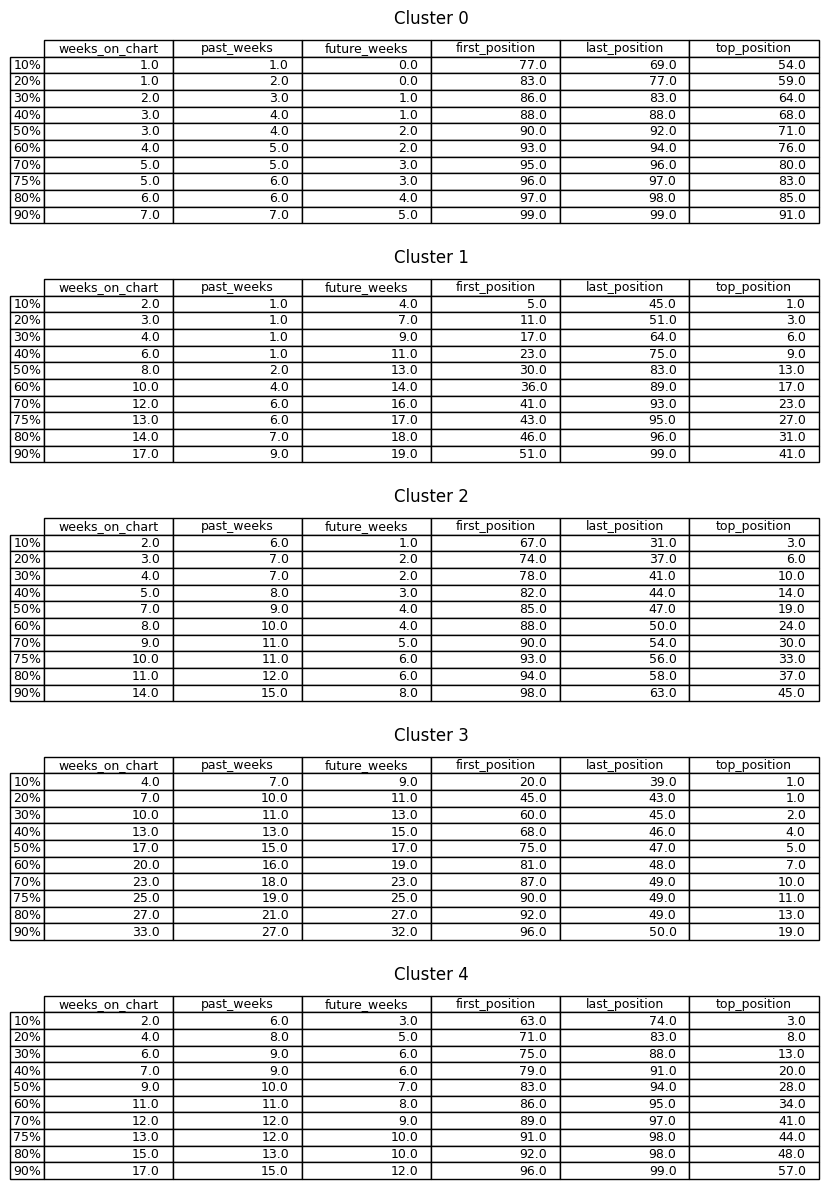

In [31]:

fig, axes = plt.subplots(5, 1, figsize=(10, 15))

cluster_names = ["Brief", "High-start", "High-end", "Long-lasting", "Normal"]

for i, cluster in enumerate(unique_clusters):
    ax = axes[i]
    ax.axis('off')
    tab = table(ax, cluster_statistics[cluster].loc[["10%", "20%", "30%", "40%", "50%", "60%", "70%", "75%", "80%", "90%"]], loc="center")
    latex_str = cluster_statistics[cluster].loc[["10%", "20%", "30%", "40%", "50%", "60%", "70%", "75%", "80%", "90%"]].round(0).to_latex()
    latex_str = latex_str.replace('_', '\\_')
    with open(f"{cluster}.txt", "w") as f:
        f.write(latex_str)

    with open("all_clusters.txt", "a") as f:
        if i == 0:
            f.write(f"Cluster: {cluster}\n")
        else:
            f.write(f"\n\nCluster: {cluster}\n")
        f.write(latex_str)
        f.write("\n")
    ax.set_title(f"Cluster {cluster}", y=1)

plt.savefig("appendix/2.B.2.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show()


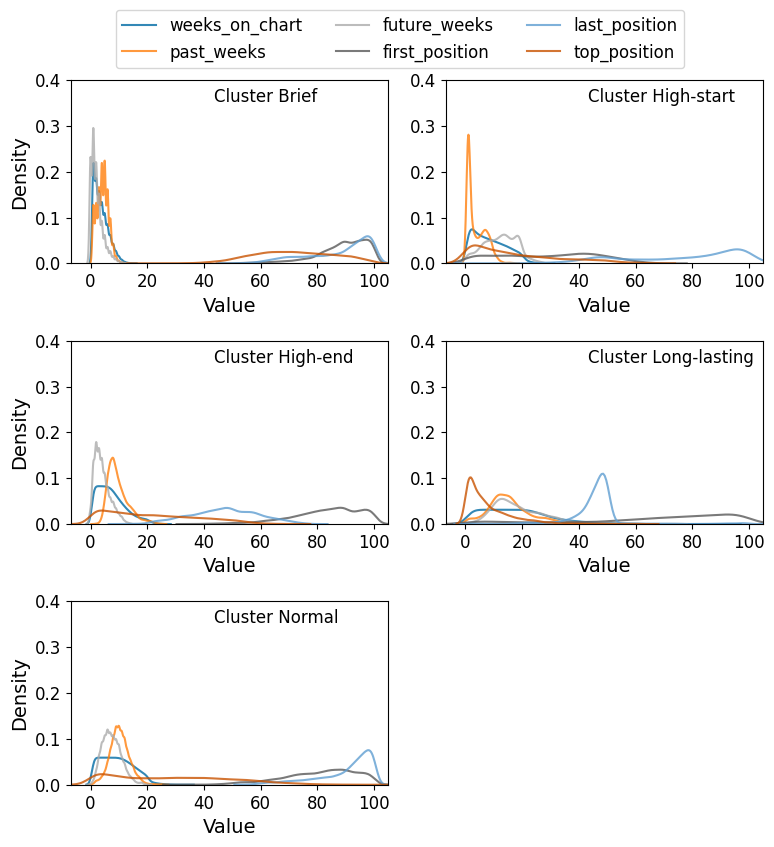

In [32]:
# plot distribution of all statistics
fig, axes = plt.subplots(3, 2, figsize=(8, 8))

for j, cluster in enumerate(unique_clusters):
    ax = axes[j // 2, j % 2]
    for i, feature in enumerate(["weeks_on_chart", "past_weeks", "future_weeks", "first_position", "last_position", "top_position"]):
        sns.kdeplot(billboard_hot_100_new[billboard_hot_100_new["cluster"] == cluster][feature], ax=ax, label=f"{feature}",
                    bw_adjust=1.5, alpha=0.8)

    if j % 2 == 1:
        ax.set_ylabel("")
    ax.set_xlabel("Value")
    ax.set_ylim([0, 0.4])
    ax.set_xlim([-7, 105])
    ax.text(0.45, 0.88, f"Cluster {cluster_names[cluster]}", transform=ax.transAxes)

lines, labels = axes[0, 0].get_legend_handles_labels()
legend_bbox = (0.46, 0.97, 0.1, 0.1)
fig.legend(lines, labels, ncol=3, loc='center', bbox_to_anchor=legend_bbox, bbox_transform=fig.transFigure)
fig.axes[-1].axis('off')
fig.tight_layout()
plt.savefig(f"appendix/2.B.2b.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show()

In [33]:
def map_cluster_name(cluster_nr):
    if cluster_nr == brief_cluster:
        return "Brief"
    if cluster_nr == start_high_cluster:
        return "High-start"
    if cluster_nr == end_high_cluster:
        return "High-end"
    if cluster_nr == normal_cluster:
        return "Climbing"
    return "Long-lasting"

billboard_hot_100_new["cluster"] = billboard_hot_100_new["cluster"].map(lambda x: map_cluster_name(x))

In [34]:
rows_to_add = []

grouped = billboard_hot_100_new.groupby(["artist", "song_name"])

for name, group in tqdm(grouped):
    max_week = group["first_day_of_the_week"].max()

    for row_index, row in group.iterrows():
        if row["first_day_of_the_week"] == max_week:
            week = row["first_day_of_the_week"] + timedelta(weeks=1)

            while week <= (max_week + timedelta(weeks=50)):
                rows_to_add.append({
                    "artist": row["artist"],
                    "song_name": row["song_name"],
                    "weeks_on_chart": row["weeks_on_chart"],
                    "position": 101,
                    "first_day_of_the_week": week,
                    "top_position": row["top_position"],
                    "first_position": row["first_position"],
                    "last_position": row["last_position"],
                    "past_weeks": row["past_weeks"],
                    "future_weeks": row["future_weeks"],
                    "max_weeks_on_chart": row["max_weeks_on_chart"],
                    "cluster": row["cluster"],
                    "year": row["year"]
                })
                week += timedelta(weeks=1)

billboard_100_with_empty_weeks_ml = pd.concat([billboard_hot_100_new[["artist", "song_name",
    "weeks_on_chart", "position", "first_day_of_the_week", "top_position",
    "first_position", "last_position", "past_weeks", "future_weeks",
    "max_weeks_on_chart", "cluster", "year"]], pd.DataFrame(rows_to_add)], ignore_index=True)
billboard_100_with_empty_weeks_ml["first_week"] = billboard_100_with_empty_weeks_ml.groupby(["artist", "song_name"])["first_day_of_the_week"].transform("min")

100%|██████████| 30147/30147 [01:21<00:00, 369.97it/s]


100%|██████████| 5/5 [00:24<00:00,  4.80s/it]


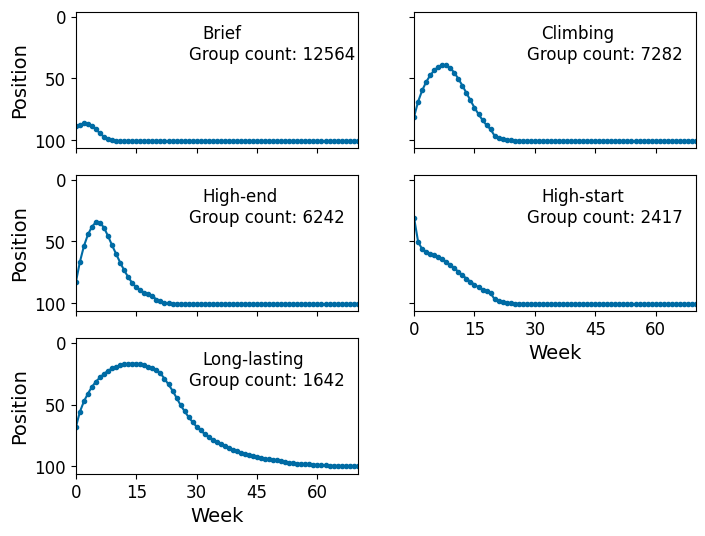

In [35]:
fig, axes = plt.subplots(math.ceil(len(unique_clusters)/2), 2, figsize=(8, 6), sharex=True, sharey=True)
row_i, col_i = 0, 0
unique_clusters = unique(billboard_100_with_empty_weeks_ml['cluster'])
models = {}

for cluster in tqdm(unique_clusters):
    songs_from_cluster = billboard_100_with_empty_weeks_ml[billboard_100_with_empty_weeks_ml['cluster'] == cluster].copy()
        
    min_first_week = songs_from_cluster["first_day_of_the_week"].min().to_pydatetime()
    songs_from_cluster["first_day_of_the_week"] = songs_from_cluster.apply(lambda row:
        int(((min_first_week + timedelta(
                days=(row["first_day_of_the_week"] - row["first_week"]).days)) - min_first_week).days / 7), axis=1)

    songs_from_cluster.set_index("first_day_of_the_week", inplace=True)
    songs_from_cluster.sort_index(inplace=True)

    axes[row_i, col_i].plot(songs_from_cluster.groupby("first_day_of_the_week")["position"].mean(),
            marker='o', ms=3)
    
    x = songs_from_cluster.groupby("first_day_of_the_week")["position"].mean().index
    y = songs_from_cluster.groupby("first_day_of_the_week")["position"].mean().values

    pwlf_cluster = pwlf.PiecewiseLinFit(x[0:70], y[0:70])
    models[cluster] = pwlf_cluster, x[0:70], y[0:70]
    
    number_of_songs = songs_from_cluster[["artist", "song_name"]].drop_duplicates().shape[0]
    axes[row_i, col_i].text(0.4, 0.65, f"Group count: {number_of_songs}", transform=axes[row_i, col_i].transAxes)
        
    axes[row_i, col_i].text(0.45, 0.8, f"{cluster}", transform=axes[row_i, col_i].transAxes)
    if row_i == 2 or ((row_i == 1) and (col_i == 1)):
        axes[row_i, col_i].set_xlabel("Week")
        axes[row_i, col_i].xaxis.set_tick_params(labelbottom=True)
        axes[row_i, col_i].xaxis.set_major_locator(plt.MaxNLocator(6))
        for tk in axes[row_i, col_i].get_xticklabels():
                tk.set_visible(True)

    if col_i == 0:
        axes[row_i, col_i].set_ylabel("Position")

    col_i += 1
    if col_i == 2:
        col_i = 0
        row_i += 1

fig.delaxes(axes[2, 1])
plt.xlim(0, 70)
plt.gca().invert_yaxis()
plt.show()

  0%|          | 0/5 [00:00<?, ?it/s]

Test for {cluster}


 20%|██        | 1/5 [00:02<00:08,  2.03s/it]

[{'segment': 1, 'observed_slope': np.float64(0.6452842697112252), 'observed_intercept': np.float64(-88.18632849483606), 'slope_p_value': np.float64(0.0816), 'slope_CI': (np.float64(-0.6673025100932793), np.float64(0.6673025100932688))}, {'segment': 2, 'observed_slope': np.float64(-2.7683280623897066), 'observed_intercept': np.float64(-77.46623519893421), 'slope_p_value': np.float64(0.0173), 'slope_CI': (np.float64(-2.4669478147039676), np.float64(2.4947608693573615))}, {'segment': 3, 'observed_slope': np.float64(-0.0016783670548173842), 'observed_intercept': np.float64(-100.87584312376819), 'slope_p_value': np.float64(0.1377), 'slope_CI': (np.float64(-0.0021316862653814913), np.float64(0.0020992321035953987))}]
Test for {cluster}


 40%|████      | 2/5 [00:04<00:06,  2.04s/it]

[{'segment': 1, 'observed_slope': np.float64(6.569814878814513), 'observed_intercept': np.float64(-75.99640923328025), 'slope_p_value': np.float64(0.0005), 'slope_CI': (np.float64(-5.144261323593326), np.float64(5.081590603418556))}, {'segment': 2, 'observed_slope': np.float64(-4.845572875922501), 'observed_intercept': np.float64(0.219283189310012), 'slope_p_value': np.float64(0.0), 'slope_CI': (np.float64(-2.5686461611186204), np.float64(2.622337439356774))}, {'segment': 3, 'observed_slope': np.float64(-0.02002057495728716), 'observed_intercept': np.float64(-99.82194847682449), 'slope_p_value': np.float64(0.0), 'slope_CI': (np.float64(-0.010544014276907787), np.float64(0.010401803835588254))}]
Test for {cluster}


 60%|██████    | 3/5 [00:06<00:04,  2.02s/it]

[{'segment': 1, 'observed_slope': np.float64(11.174959470223925), 'observed_intercept': np.float64(-79.36407593948883), 'slope_p_value': np.float64(0.0158), 'slope_CI': (np.float64(-10.243428689815913), np.float64(9.897387900113713))}, {'segment': 2, 'observed_slope': np.float64(-5.429391196414999), 'observed_intercept': np.float64(-4.755580383794694), 'slope_p_value': np.float64(0.0), 'slope_CI': (np.float64(-3.0224684075632764), np.float64(3.089562942977398))}, {'segment': 3, 'observed_slope': np.float64(-0.048807645904890215), 'observed_intercept': np.float64(-98.28140615006829), 'slope_p_value': np.float64(0.0), 'slope_CI': (np.float64(-0.028269263522864387), np.float64(0.02831598748229374))}]
Test for {cluster}


 80%|████████  | 4/5 [00:08<00:02,  2.02s/it]

[{'segment': 1, 'observed_slope': np.float64(-19.335651077034473), 'observed_intercept': np.float64(-30.921803877737247), 'slope_p_value': np.float64(0.0), 'slope_CI': (np.float64(-19.33565096178424), np.float64(19.335650961784232))}, {'segment': 2, 'observed_slope': np.float64(-2.2563558254953167), 'observed_intercept': np.float64(-50.103116458872556), 'slope_p_value': np.float64(0.0), 'slope_CI': (np.float64(-0.9940293178406945), np.float64(0.9843252478053792))}, {'segment': 3, 'observed_slope': np.float64(-0.012805653704793193), 'observed_intercept': np.float64(-100.22782093644872), 'slope_p_value': np.float64(0.0), 'slope_CI': (np.float64(-0.005892009988970125), np.float64(0.00597145135642964))}]
Test for {cluster}


100%|██████████| 5/5 [00:10<00:00,  2.03s/it]

[{'segment': 1, 'observed_slope': np.float64(3.2345746953937056), 'observed_intercept': np.float64(-53.65453654584823), 'slope_p_value': np.float64(0.0), 'slope_CI': (np.float64(-1.7952906546748597), np.float64(1.8268330374837727))}, {'segment': 2, 'observed_slope': np.float64(-3.672973808649869), 'observed_intercept': np.float64(46.13968321677417), 'slope_p_value': np.float64(0.0), 'slope_CI': (np.float64(-1.5340950668162237), np.float64(1.5686612405905302))}, {'segment': 3, 'observed_slope': np.float64(-0.46233176242686874), 'observed_intercept': np.float64(-70.64472501400611), 'slope_p_value': np.float64(0.0), 'slope_CI': (np.float64(-0.17017348322920137), np.float64(0.16802487398582652))}]


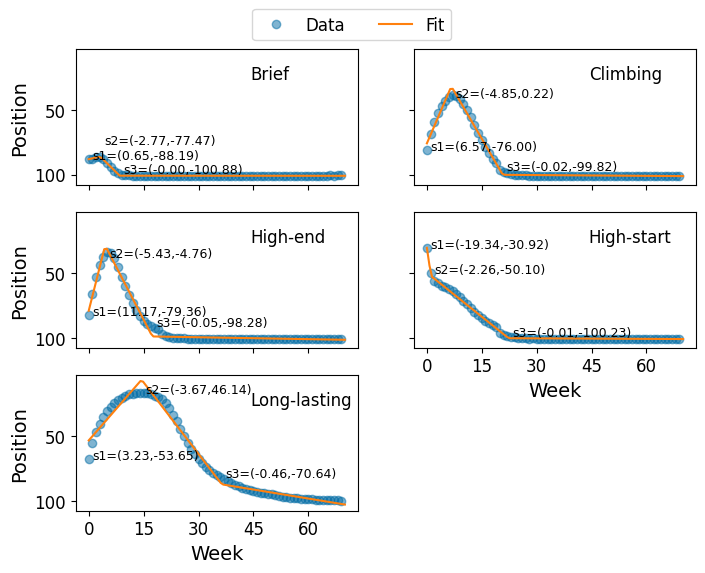

In [36]:

fig, axes = plt.subplots(math.ceil(len(unique_clusters)/2), 2, figsize=(8, 6), sharex=True, sharey=True)
row_i, col_i = 0, 0
unique_clusters = unique(billboard_100_with_empty_weeks_ml['cluster'])

for cluster in tqdm(unique_clusters):
    model, x, y = models[cluster]
    x_hat = np.linspace(0, 70, 100)
    values = model.fit(3)
    y_hat = model.predict(x_hat)
    axes[row_i, col_i].plot(x, y, 'o', alpha=0.5)
    axes[row_i, col_i].plot(x_hat, y_hat, '-')
    # print(f"P values for cluster {cluster}: {model.p_values(method="non-linear")}")
    slopes = model.calc_slopes()
    slopes = -1 * slopes
    intercepts = model.intercepts
    intercepts = -1 * intercepts
    print("Test for {cluster}")
    print(test_segments(x, y, [values[1], values[2]], slopes, intercepts))

    axes[row_i, col_i].text(0.62, 0.78, f"{cluster}", transform=axes[row_i, col_i].transAxes)

    for i, (slope, intercept) in enumerate(zip(slopes, intercepts)):
        if (cluster == "Brief") and (i == 1):
            axes[row_i, col_i].text(values[i] + 1, y[np.ceil(values[i].astype(int))] - 10, f"s{i+1}=({slope:.2f},{intercept:.2f})", fontsize=9)
        else:
            axes[row_i, col_i].text(values[i] + 1, y[np.ceil(values[i].astype(int))], f"s{i+1}=({slope:.2f},{intercept:.2f})", fontsize=9)

    if row_i == 2 or ((row_i == 1) and (col_i == 1)):
        axes[row_i, col_i].set_xlabel("Week")
        axes[row_i, col_i].xaxis.set_tick_params(labelbottom=True)
        axes[row_i, col_i].xaxis.set_major_locator(plt.MaxNLocator(6))
        for tk in axes[row_i, col_i].get_xticklabels():
                tk.set_visible(True)

    if col_i == 0:
        axes[row_i, col_i].set_ylabel("Position")
    
    col_i += 1
    if col_i == 2:
        col_i = 0
        row_i += 1

fig.delaxes(axes[2, 1])
fig.legend(["Data", "Fit"], bbox_to_anchor=(0.47, 0.92), loc='center', ncols=2)

plt.gca().invert_yaxis()
plt.savefig("appendix/2.B.1.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show()


### Archetypes over time

<Figure size 600x400 with 0 Axes>

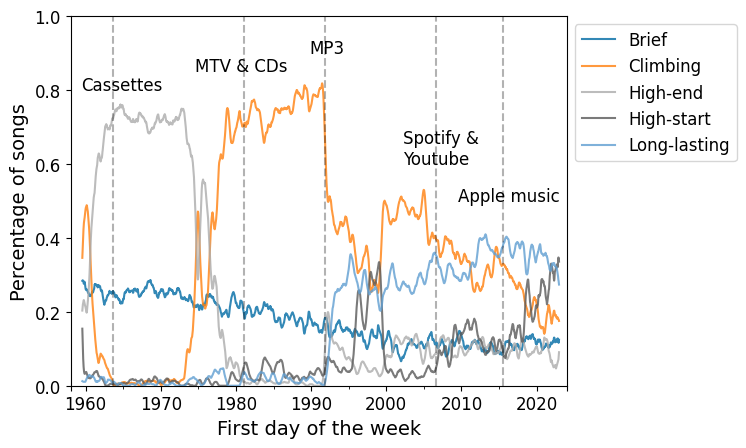

In [37]:
plt.figure(figsize=(6, 4))

billboard_hot_100_new_full_data = billboard_hot_100_new
billboard_hot_100_new_full_data.groupby(["first_day_of_the_week"])["cluster"].value_counts(
    normalize=True).unstack(fill_value=0).stack().sort_index().unstack().rolling(window=30).mean().plot(alpha=0.8)

plt.axvline(x = youtube_creation_date + timedelta(days=(spotify_creation_date - youtube_creation_date).days/2),
                                color='black', ls="dashed", alpha=0.3)
plt.axvline(x = apple_music_creation_date, color='black', ls="dashed", alpha=0.3)
plt.axvline(x = mtv_launch_date + timedelta(days=(mtv_launch_date - cds_creation_date).days/2), color='black',
                                ls="dashed", alpha=0.3)
plt.axvline(x = mp3_creation_date, color='black', ls="dashed", alpha=0.3)
plt.axvline(x = cassettes_creation_date, color="black", ls="dashed", alpha=0.3)

plt.text(youtube_creation_date - timedelta(weeks=150), 0.6, "Spotify &\nYoutube")
plt.text(apple_music_creation_date - timedelta(weeks=310), 0.5, "Apple music")
plt.text(mtv_launch_date - timedelta(weeks=370), 0.85, "MTV & CDs")
plt.text(mp3_creation_date - timedelta(weeks=110), 0.9, "MP3")
plt.text(cassettes_creation_date - timedelta(weeks=220), 0.8, "Cassettes")

plt.ylabel("Percentage of songs")
plt.xlabel("First day of the week")
plt.xlim(datetime(1958, 1, 1), datetime(2024, 1, 1))
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

C:\Users\cutie\AppData\Local\Temp\ipykernel_12504\3792942036.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


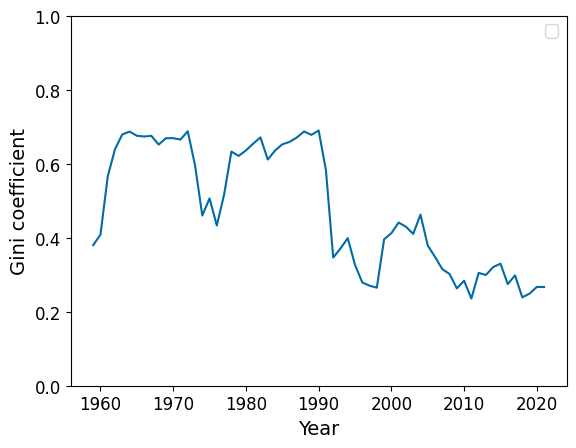

In [38]:
# gini coefficient to show inequality in the clusters

cluster_data = billboard_hot_100_new_full_data.groupby(["year"])["cluster"].value_counts(
    normalize=True).unstack(fill_value=0).stack().sort_index().unstack()

gini_coefficients = []

for year in range(1959, 2022):
    cluster_data_year = cluster_data.loc[year]

    gini_coefficients.append(gini_coefficient(cluster_data_year))

plt.plot(range(1959, 2022), gini_coefficients)
plt.ylabel("Gini coefficient")
plt.xlabel("Year")
plt.legend()
plt.ylim(0, 1)
plt.savefig("appendix/2.A.1.jpg", format="jpg", dpi=300, bbox_inches="tight")

plt.show()

[np.float64(0.3804615384615385), np.float64(0.4087692307692308), np.float64(0.5663846153846154), np.float64(0.6401509433962265), np.float64(0.6798461538461538), np.float64(0.6876153846153846), np.float64(0.6763076923076923), np.float64(0.6743076923076924), np.float64(0.6760769230769231), np.float64(0.6524528301886792), np.float64(0.6696923076923077), np.float64(0.6697692307692308), np.float64(0.666076923076923), np.float64(0.6886153846153846), np.float64(0.596754716981132), np.float64(0.4604615384615385), np.float64(0.5068461538461538), np.float64(0.43341674687199233), np.float64(0.5171032357473034), np.float64(0.6335384615384616), np.float64(0.621811320754717), np.float64(0.6366153846153846), np.float64(0.655), np.float64(0.6718461538461539), np.float64(0.612), np.float64(0.6362264150943396), np.float64(0.6530769230769231), np.float64(0.6597692307692308), np.float64(0.6716153846153847), np.float64(0.688), np.float64(0.6786923076923077), np.float64(0.6904905660377358), np.float64(0.583

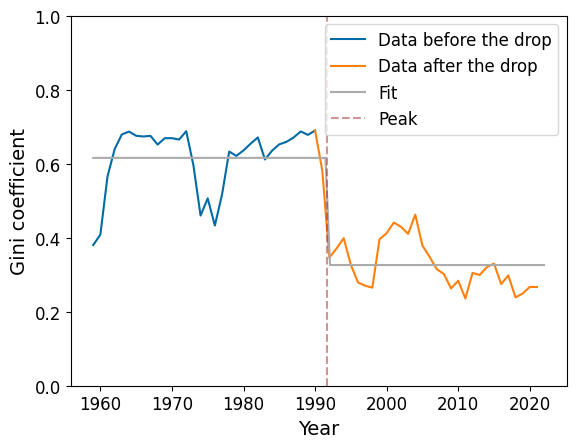

Slopes: [ 0.         -0.00988306]
Intercepts: [0.61645755], [0.32651751]
intercept diff: [0.28994003]
Break year: 1991.6629416055855
Predict break: [0.32651751]
95% CI: (-0.2130, 0.2126)
Observed intercept difference was outside the 95% CI (indicating significance).
P-value: 0.0
[{'segment': 1, 'observed_slope': np.float64(0.0), 'observed_intercept': np.float64(0.45099941553937095), 'slope_p_value': np.float64(1.0), 'slope_CI': (np.float64(-0.0027638319924963607), np.float64(0.00274600720073196))}, {'segment': 2, 'observed_slope': np.float64(0.009269539014983202), 'observed_intercept': np.float64(-18.15947741210502), 'slope_p_value': np.float64(0.0), 'slope_CI': (np.float64(-0.0042557225793077285), np.float64(0.004251633797987221))}]


In [105]:
# gini coefficient to show inequality in the clusters

cluster_data = billboard_hot_100_new_full_data.groupby(["year"])["cluster"].value_counts(
    normalize=True).unstack(fill_value=0).stack().sort_index().unstack()

gini_coefficients = []

for year in range(1959, 2022):
    cluster_data_year = cluster_data.loc[year]

    gini_coefficients.append(gini_coefficient(cluster_data_year))

x = np.array(range(1959, 2022))
x1 = range(1959, 1991)
x2 = range(1990, 2022)
y1 = gini_coefficients[:len(x1)]
y2 = gini_coefficients[-len(x2):]

print(gini_coefficients)
model = pwlf.PiecewiseLinFit(x, gini_coefficients, degree=0)
breaks = model.fit(2)
print(breaks)

x_hat = np.linspace(1959, 2022, 100)
y_hat = model.predict(x_hat)

plt.plot(x1, y1, label="Data before the drop")
plt.plot(x2, y2, label="Data after the drop")
plt.plot(x_hat, y_hat, label="Fit")
plt.axvline(x=breaks[1], linestyle='--', color='brown', label="Peak", alpha=0.5)
plt.ylabel("Gini coefficient")
plt.xlabel("Year")
plt.legend(loc="upper right")
plt.ylim(0, 1)
plt.savefig("appendix/2.A.2.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show()
slopes = model.calc_slopes()
print(f"Slopes: {slopes}")
intercept_diff = model.predict([breaks[1]]) - model.predict([breaks[2]])
# code in pwlf library doesn't return intercepts correctly for degree 0
print(f"Intercepts: {model.predict([breaks[1]])}, {model.predict([breaks[2]])}")
print(f"intercept diff: {intercept_diff}")
print(f"Break year: {breaks[1]}")

intercept_diffs = []
print(f"Predict break: {model.predict([breaks[2]])}")

for i in range(1000):
    shuffled_gini = np.random.permutation(gini_coefficients)
    model = pwlf.PiecewiseLinFit(range(1959, 2022), shuffled_gini, degree=0)
    breaks = model.fit(2)
    intercept_diffs.append(model.predict([breaks[1]]) - model.predict([breaks[2]]))

lower_percentile = 2.5
upper_percentile = 97.5
ci_lower = np.percentile(intercept_diffs, lower_percentile)
ci_upper = np.percentile(intercept_diffs, upper_percentile)
print(f"95% CI: ({ci_lower:.4f}, {ci_upper:.4f})")
if intercept_diff < ci_lower or intercept_diff > ci_upper:
    print("Observed intercept difference was outside the 95% CI (indicating significance).")
else:
    print("Observed intercept difference was inside the 95% CI.")
print(f"P-value: {np.mean(np.array(intercept_diffs) > intercept_diff)}")

print(test_segments(np.array(range(1959, 2022)), np.array(gini_coefficients), [np.ceil(breaks[1])], model.slopes, model.intercepts))

### Plotted together

100%|██████████| 5/5 [00:25<00:00,  5.14s/it]
C:\Users\cutie\AppData\Local\Temp\ipykernel_12504\1847365801.py:160: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  plt.savefig("fig2.jpg", format="jpg", bbox_inches='tight', dpi=300)
C:\Users\cutie\AppData\Local\Temp\ipykernel_12504\1847365801.py:160: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  plt.savefig("fig2.jpg", format="jpg", bbox_inches='tight', dpi=300)
C:\Users\cutie\AppData\Local\Temp\ipykernel_12504\1847365801.py:160: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  plt.savefig("fig2.jpg", format="jpg", bbox_inches='tight', dpi=300)
C:\Users\cutie\AppData\Local\Temp\ipykernel_12504\1847365801.py:160: UserWarning: constrained_layout not applied because axes 

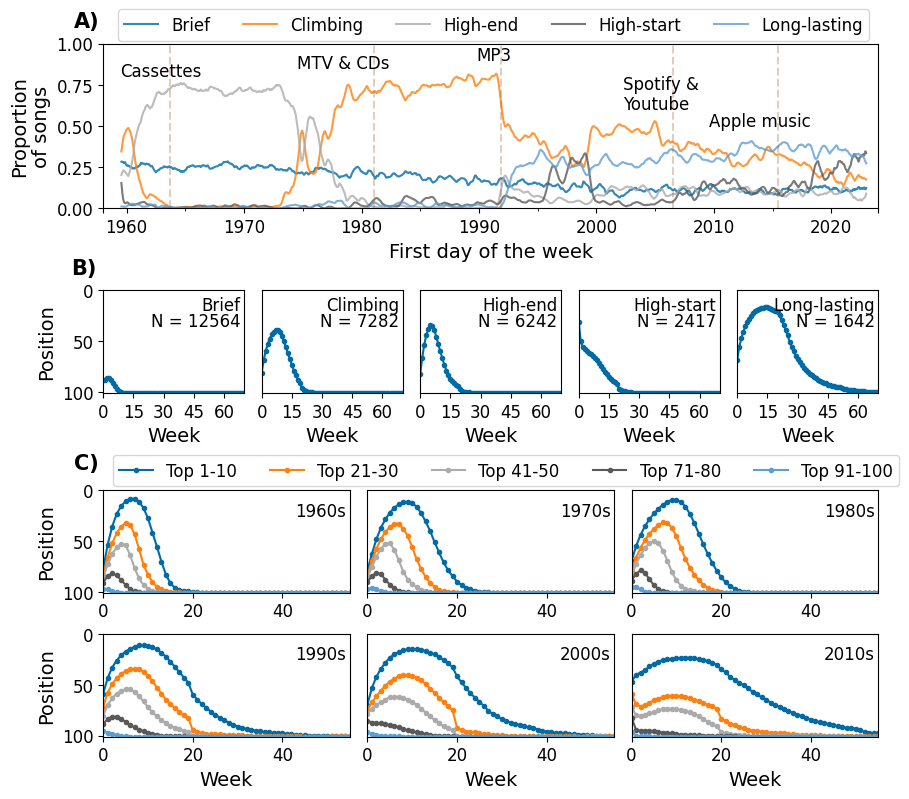

In [106]:
fig, axes = plt.subplot_mosaic([["A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A"],
                                [".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
                                ["B1", "B1", "B1", "B2", "B2", "B2", "B3", "B3", "B3", "B4", "B4", "B4", "B5", "B5", "B5"],
                                [".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
                                ["C1", "C1", "C1", "C1", "C1", "C2", "C2", "C2", "C2", "C2", "C3", "C3", "C3", "C3", "C3"],
                                ["C4", "C4", "C4", "C4", "C4", "C5", "C5", "C5", "C5", "C5", "C6", "C6", "C6", "C6", "C6"]], figsize=(10, 9),
    gridspec_kw={'height_ratios': [1.6, 0.001, 1, 0.15, 1, 1], 'width_ratios': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 'wspace': 0.5, 'hspace': 0.5}, constrained_layout=True)

# Plot A

ax = axes['A']

billboard_hot_100_new_full_data = billboard_hot_100_new
billboard_hot_100_new_full_data.groupby(["first_day_of_the_week"])["cluster"].value_counts(
    normalize=True).unstack(fill_value=0).stack().sort_index().unstack().rolling(window=30).mean().plot(alpha=0.8, ax=ax, legend=False).set(xlabel=None)

ax.axvline(x = youtube_creation_date + timedelta(days=(spotify_creation_date - youtube_creation_date).days/2),
                                color=brown, ls="dashed", alpha=0.3)
ax.axvline(x = apple_music_creation_date, color=brown, ls="dashed", alpha=0.3)
ax.axvline(x = mtv_launch_date + timedelta(days=(mtv_launch_date - cds_creation_date).days/2), color=brown,
                                ls="dashed", alpha=0.3)
ax.axvline(x = mp3_creation_date, color=brown, ls="dashed", alpha=0.3)
ax.axvline(x = cassettes_creation_date, color=brown, ls="dashed", alpha=0.3)

ax.text(youtube_creation_date - timedelta(weeks=150), 0.6, "Spotify &\nYoutube")
ax.text(apple_music_creation_date - timedelta(weeks=310), 0.5, "Apple music")
ax.text(mtv_launch_date - timedelta(weeks=370), 0.85, "MTV & CDs")
ax.text(mp3_creation_date - timedelta(weeks=110), 0.9, "MP3")
ax.text(cassettes_creation_date - timedelta(weeks=220), 0.8, "Cassettes")

ax.set_ylabel("Proportion\nof songs")
ax.set_xlabel("First day of the week")
ax.set_xlim(datetime(1958, 1, 1), datetime(2024, 1, 1))
ax.set_ylim(0, 1)
ax.legend(loc='upper left', bbox_to_anchor=(0.008, 1.26), ncol=5)

axes['A'].text(-0.038, 1.1, 'A)', transform=axes['A'].transAxes, weight='bold', fontsize=15)

# Plot B

col_i = 0
unique_clusters = unique(billboard_100_with_empty_weeks_ml['cluster'])

for cluster in tqdm(unique_clusters):
    ax = axes[f'B{col_i + 1}']
    songs_from_cluster = billboard_100_with_empty_weeks_ml[billboard_100_with_empty_weeks_ml['cluster'] == cluster].copy()
        
    min_first_week = songs_from_cluster["first_day_of_the_week"].min().to_pydatetime()
    songs_from_cluster["first_day_of_the_week"] = songs_from_cluster.apply(lambda row:
        int(((min_first_week + timedelta(
                days=(row["first_day_of_the_week"] - row["first_week"]).days)) - min_first_week).days / 7), axis=1)

    songs_from_cluster.set_index("first_day_of_the_week", inplace=True)
    songs_from_cluster.sort_index(inplace=True)

    ax.plot(songs_from_cluster.groupby("first_day_of_the_week")["position"].mean(),
            marker='o', ms=3)
    number_of_songs = songs_from_cluster[["artist", "song_name"]].drop_duplicates().shape[0]
    ax.text(0.975, 0.65, f"N = {number_of_songs}", transform=ax.transAxes, horizontalalignment='right')

    ax.text(0.975, 0.8, f"{cluster}", transform=ax.transAxes, horizontalalignment='right')
    ax.set_xlabel("Week")
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.xaxis.set_major_locator(plt.MaxNLocator(6))
    for tk in ax.get_xticklabels():
        tk.set_visible(True)

    if col_i == 0:
        ax.set_ylabel("Position")
    
    if col_i != 0:
        ax.set_yticks([])
        ax.set_yticks([], minor=True)
        ax.yaxis.set_tick_params(labelbottom=False)

    ax.set_xlim(0, 70)
    ax.set_ylim([0, 101])
    ax.set_ylim(ax.get_ylim()[::-1])

    if col_i != 0:
        ax.yaxis.set_tick_params(labelleft=False)
    else:
        ax.yaxis.set_tick_params(labelleft=True)
    col_i += 1

axes['B1'].text(-0.23, 1.15, 'B)', transform=axes['B1'].transAxes, weight='bold', fontsize=15)

# Plot C

col_i = 0

for year in range(1960, 2020, 10):
    ax = axes[f'C{col_i + 1}']
    # all songs in the decade
    all_songs_in_decade = billboard_100_with_empty_weeks[(billboard_100_with_empty_weeks["year"] >= year) &\
        (billboard_100_with_empty_weeks["year"] < year + 10)][["artist", "song_name", "first_day_of_the_week", "top_position", "position",
            "first_week"]]

    # songs from other decades
    songs_from_other_decades = billboard_hot_100[(billboard_hot_100["year"] < year) |\
        (billboard_hot_100["year"] >= year + 10)][["artist", "song_name"]]

    for top_position, low_positions in [(1, 10),  (21, 30), (41, 50), (71, 80), (91, 100)]:
        # songs that reached top 50 in the decade
        top_x_positions_in_decade = all_songs_in_decade[(all_songs_in_decade["top_position"] <= low_positions) &\
            (all_songs_in_decade["top_position"] >= top_position)][["artist", "song_name"]]

        # take songs only from this decade
        top_x_positions_in_decade = top_x_positions_in_decade[~(top_x_positions_in_decade["artist"].isin(songs_from_other_decades["artist"]) &\
            top_x_positions_in_decade["song_name"].isin(songs_from_other_decades["song_name"]))]

        # take all positions of the songs
        top_x_positions_in_decade = top_x_positions_in_decade[["artist", "song_name"]].drop_duplicates().merge(
            billboard_100_with_empty_weeks[["artist", "song_name",
                "position", "first_day_of_the_week", "first_week"]], on=["artist", "song_name"], how="left")

        min_first_week = top_x_positions_in_decade["first_day_of_the_week"].min().to_pydatetime()

        top_x_positions_in_decade["first_day_of_the_week"] = top_x_positions_in_decade.apply(lambda row:
            int(((min_first_week + timedelta(
                    days=(row["first_day_of_the_week"] - row["first_week"]).days)) - min_first_week).days / 7), axis=1)

        top_x_positions_in_decade.set_index("first_day_of_the_week", inplace=True)
        top_x_positions_in_decade.sort_index(inplace=True)

        ax.plot(top_x_positions_in_decade.groupby("first_day_of_the_week")["position"].mean(),
            marker='o', label=f"Top {top_position}-{low_positions}", ms=3)

    ax.text(0.78, 0.75, f"{year}s", transform=ax.transAxes)
    if col_i >= 3:
        ax.set_xlabel("Week")
    if col_i % 3 == 0:
        ax.set_ylabel("Position")

    ax.set_xlim([0, 55])
    ax.set_ylim([0, 101])
    ax.set_ylim(ax.get_ylim()[::-1])

    if col_i != 0 and col_i != 3:
        ax.set_yticks([])
        ax.set_yticks([], minor=True)
        ax.yaxis.set_tick_params(labelbottom=False)
    
    if col_i <= 2:
        ax.set_title(' ')
    if col_i == 0:
        ax.legend(loc='upper left', bbox_to_anchor=(0.005, 1.42), ncol=5)
        #fig.legend(lines, labels, ncol=5, loc='center', bbox_to_anchor=legend_bbox, bbox_transform=fig.transFigure)

    col_i += 1

# lines_labels = [ax.get_legend_handles_labels() for ax in [axes["C1"]]]
# lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# legend_bbox = (0.465, 0.205, 0.1, 0.1)
# fig.legend(lines, labels, ncol=5, loc='center', bbox_to_anchor=legend_bbox, bbox_transform=fig.transFigure)

axes['C1'].text(-0.12, 1.2, 'C)', transform=axes['C1'].transAxes, weight='bold', fontsize=15)

plt.savefig("fig2.jpg", format="jpg", bbox_inches='tight', dpi=300)
plt.show()

## Songs movement changes

### Proportion of small jumps

In [107]:
def calculate_position_difference(position, last_week_position):
    if np.isnan(last_week_position):
        return np.nan
    return last_week_position - position

billboard_hot_100["position_change"] = billboard_hot_100.apply(
    lambda x: calculate_position_difference(x["position"], x["last_week_position"]), axis=1)

In [108]:
billboard_hot_100["diffusion_jump"] = billboard_hot_100["position_change"] < 10

In [109]:
# https://stackoverflow.com/questions/13728392/moving-average-or-running-mean
def moving_average(x, w):
    return np.convolve(x, np.ones(w) / w, 'valid')

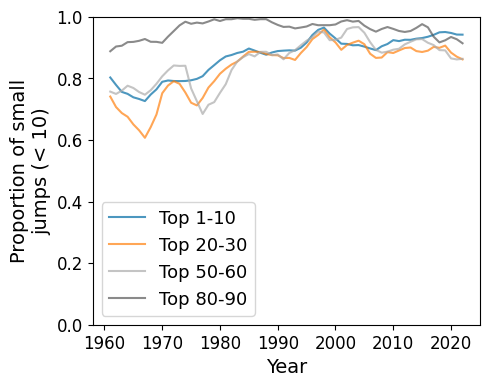

In [110]:
plt.figure(figsize=(5, 4))

diffusion_jumps_top_10 = []
diffusion_jumps_top_20_30 = []
diffusion_jumps_top_50_60 = []
diffusion_jumps_top_80_90 = []
for year in range(1959, 2023):
    songs_from_year = billboard_hot_100[billboard_hot_100["year"] == year].dropna()
    diffusion_jumps_top_10.append(songs_from_year[songs_from_year["top_position"] <= 10]["diffusion_jump"].mean())
    diffusion_jumps_top_20_30.append(songs_from_year[(songs_from_year["top_position"] > 20) & (songs_from_year["top_position"] <= 30)]["diffusion_jump"].mean())
    diffusion_jumps_top_50_60.append(songs_from_year[(songs_from_year["top_position"] > 50) & (songs_from_year["top_position"] <= 60)]["diffusion_jump"].mean())
    diffusion_jumps_top_80_90.append(songs_from_year[(songs_from_year["top_position"] > 80) & (songs_from_year["top_position"] <= 90)]["diffusion_jump"].mean())

plt.plot(range(1959, 2023)[2:], moving_average(diffusion_jumps_top_10, 3), label="Top 1-10", alpha=0.7)
plt.plot(range(1959, 2023)[2:], moving_average(diffusion_jumps_top_20_30, 3), label="Top 20-30", alpha=0.7)
plt.plot(range(1959, 2023)[2:], moving_average(diffusion_jumps_top_50_60, 3), label="Top 50-60", alpha=0.7)
plt.plot(range(1959, 2023)[2:], moving_average(diffusion_jumps_top_80_90, 3), label="Top 80-90", alpha=0.7)
plt.xlabel("Year")
plt.ylabel("Proportion of small\njumps (< 10)")
plt.ylim([0, 1])
plt.legend(fontsize=13, loc="lower left")
plt.savefig("appendix/Test1.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show()

### Histogram of position change

In [111]:
import matplotlib.patches as patches

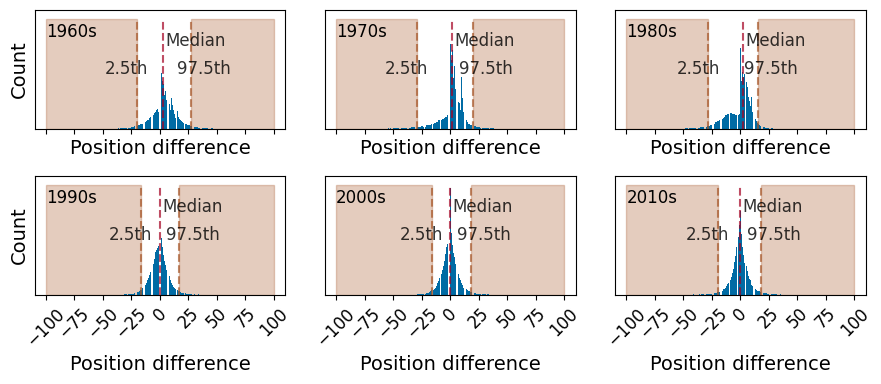

In [112]:
fig, axes = plt.subplots(2, 3, figsize=(9, 4), sharex=True, sharey=True)

row = 0
col = 0

billboard_subset = billboard_hot_100[["year", "first_day_of_the_week", "position_change"]]

for year in [1960, 1970, 1980, 1990, 2000, 2010]:
    decade_subset = billboard_subset[(billboard_subset["year"] >= year) &\
        (billboard_subset["year"] < year + 10)]["position_change"]
    count_changes = decade_subset.value_counts().sort_index()

    perecentile_25 = decade_subset.quantile(0.025)
    perecentile_975 = decade_subset.quantile(0.975)
    perecentile_50 = decade_subset.quantile(0.5)
    brown = "#a65628"
    red = "#a40122"

    axes[row, col].vlines(perecentile_25, ymin=0, ymax=6000, color=brown, linestyle='--', alpha=0.7)
    axes[row, col].vlines(perecentile_975, ymin=0, ymax=6000, color=brown, linestyle='--', alpha=0.7)
    axes[row, col].vlines(perecentile_50, ymin=0, ymax=6000, color=red, linestyle='--', alpha=0.7)
    
    # mark the percentiles 
    rect_left = patches.Rectangle((-100, 0), 100 + perecentile_25, 6000, linewidth=1, edgecolor=brown, facecolor=brown, alpha=0.3)
    axes[row, col].add_patch(rect_left)
    axes[row, col].text(perecentile_25 - 28, 3000, "2.5th", size=12, alpha = 0.8)
    rect_right = patches.Rectangle((perecentile_975, 0), 100 - perecentile_975, 6000, linewidth=1, edgecolor=brown, facecolor=brown, alpha=0.3)
    axes[row, col].add_patch(rect_right)
    axes[row, col].text(perecentile_975 - 12, 3000, "97.5th", size=12, alpha = 0.8)

    axes[row, col].text(perecentile_50 + 2, 4500, "Median", size=12, alpha = 0.8)
    axes[row, col].bar(count_changes.index, count_changes.values)

    axes[row, col].text(-100, 5000, f"{year}s")

    axes[row, col].set_xlabel("Position difference")
    if col == 0:
        axes[row, col].set_ylabel("Count")
    else:
        axes[row, col].set_ylabel(None)
    
    axes[row, col].xaxis.set_major_locator(plt.MaxNLocator(10))
    for tick in axes[row, col].get_xticklabels():
        tick.set_rotation(45)


    if col != 0 and col != 3:
        axes[row, col].set_yticks([])
        axes[row, col].set_yticks([], minor=True)
        axes[row, col].yaxis.set_tick_params(labelbottom=False)

    col += 1
    if col == 3:
        col = 0
        row += 1

plt.xticks(rotation=45)
plt.locator_params(axis='x', nbins=10)
fig.tight_layout()
plt.savefig("appendix/Test2.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show()

### Features

In [113]:
years = range(1959, 2022)

100%|██████████| 63/63 [00:00<00:00, 339.40it/s]


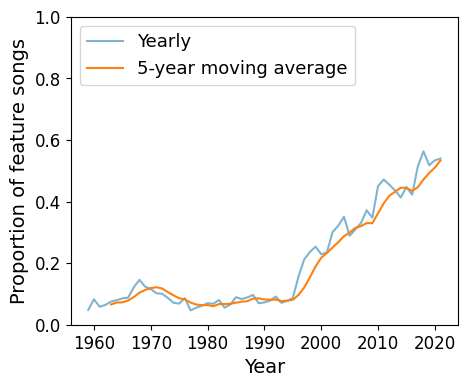

In [114]:
plt.figure(figsize=(5, 4))

percentages = []

for year in tqdm(years):
    artists_from_year = billboard_hot_100[billboard_hot_100["year"] == year][["artist"]].drop_duplicates()
    artists_features = artists_from_year[(artists_from_year["artist"].str.lower().str.contains("featuring")) |\
        (artists_from_year["artist"].str.lower().str.contains("&"))]
    percentage_of_new_features = len(artists_features)/len(artists_from_year)
    percentages.append(percentage_of_new_features)

plt.plot(years, percentages, alpha=0.5)
plt.plot(years[4:], moving_average(percentages, 5))

plt.xlabel("Year")
plt.ylim([0, 1])
plt.ylabel("Proportion of feature songs")
plt.legend(["Yearly", "5-year moving average"], loc="upper left", fontsize=13)
plt.show()

Test for Billboard Hot 100
[{'segment': 1, 'observed_slope': np.float64(-0.00033569690771586164), 'observed_intercept': np.float64(0.7442640490463177), 'slope_p_value': np.float64(0.4479), 'slope_CI': (np.float64(-0.0008585384100426212), np.float64(0.0008374793241529262))}, {'segment': 2, 'observed_slope': np.float64(0.01620930467112213), 'observed_intercept': np.float64(-32.189782862159355), 'slope_p_value': np.float64(0.0), 'slope_CI': (np.float64(-0.005895341104868418), np.float64(0.005972706491428928))}]
Break year: 1990


C:\Users\cutie\AppData\Local\Temp\ipykernel_12504\3667056927.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby('year').apply(lambda x: len(x[x['artists'].str.contains(',')]) / len(x))


Test for Kaggle data
[{'segment': 1, 'observed_slope': np.float64(-0.005178635773877417), 'observed_intercept': np.float64(10.643455509330524), 'slope_p_value': np.float64(0.0), 'slope_CI': (np.float64(-0.002815991437095725), np.float64(0.002781721754088581))}]


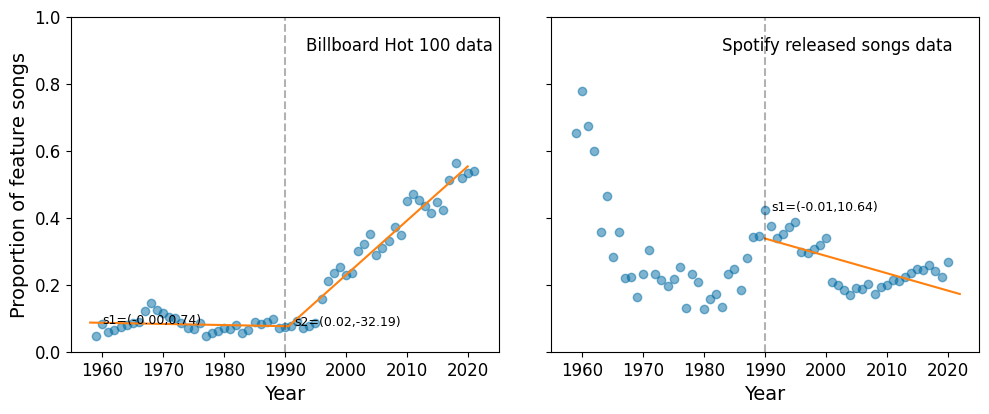

In [115]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
# billboard
ax = axes[0]
model = pwlf.PiecewiseLinFit(years, percentages)
values = model.fit(2)
x_hat = np.linspace(1958, 2020, 100)
y_hat = model.predict(x_hat)

print("Test for Billboard Hot 100")
print(test_segments(np.array(years), np.array(percentages), [values[1]], model.calc_slopes(), model.intercepts))

ax.plot(years, percentages[0:len(years)], 'o', alpha=0.5)
ax.plot(x_hat, y_hat)

slopes = model.calc_slopes()
intercepts = model.intercepts

ax.text(0.55, 0.9, "Billboard Hot 100 data", transform=ax.transAxes)

for i, (slope, intercept) in enumerate(zip(slopes, intercepts)):
    ax.text(values[i] + 1, percentages[np.ceil(values[i].astype(int)) - 1958], f"s{i+1}=({slope:.2f},{intercept:.2f})", fontsize=9)

break_year = math.floor(values[1])
print(f"Break year: {break_year}")
# kaggle
data = data_kaggle[data_kaggle['year'] >= 1959]

ax = axes[1]
data = data.groupby('year').apply(lambda x: len(x[x['artists'].str.contains(',')]) / len(x))
model = pwlf.PiecewiseLinFit(data.index[31:], data.values[31:])
values = model.fit(1)
x_hat = np.linspace(1990, 2022, 100)
y_hat = model.predict(x_hat)

print("Test for Kaggle data")
print(test_segments(data.index[31:], data.values[31:], [], model.calc_slopes(), model.intercepts))

ax.plot(data.index, data.values, 'o', alpha=0.5)
ax.plot(x_hat, y_hat, '-')
slopes = model.calc_slopes()
intercepts = model.intercepts

ax.text(0.4, 0.9, "Spotify released songs data", transform=ax.transAxes)

for i, (slope, intercept) in enumerate(zip(slopes, intercepts)):
    ax.text(values[i] + 1, data[np.ceil(values[i].astype(int))], f"s{i+1}=({slope:.2f},{intercept:.2f})", fontsize=9)

fig.tight_layout()
axes[0].set_xlabel("Year")
axes[1].set_xlabel("Year")
axes[0].set_ylabel("Proportion of feature songs")
axes[0].axvline(x=break_year, color='black', ls="dashed", alpha=0.3)
axes[1].axvline(x=break_year, color='black', ls="dashed", alpha=0.3)
plt.ylim([0, 1])
plt.savefig("appendix/3.C.1.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show()

### New artists

100%|██████████| 63/63 [00:24<00:00,  2.62it/s]


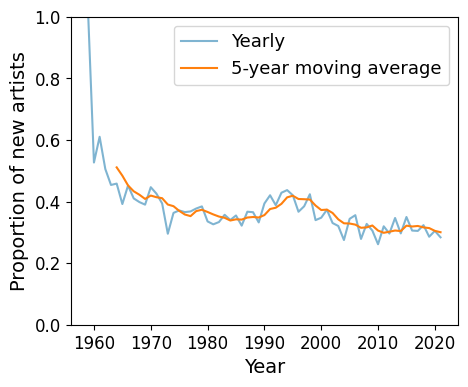

In [116]:
plt.figure(figsize=(5, 4))
years = range(1959, 2022)

percentages = []
first_week = billboard_hot_100["first_day_of_the_week"].min() + timedelta(weeks=1)
last_week = billboard_hot_100["first_day_of_the_week"].max()

for year in tqdm(years):
    artists_from_year = billboard_hot_100[(billboard_hot_100["year"] == year) &\
        ~((billboard_hot_100["artist"].str.lower().str.contains("featuring")) |\
        (billboard_hot_100["artist"].str.lower().str.contains("&")))][["artist"]].drop_duplicates()
    artists_from_previous_years = billboard_hot_100[billboard_hot_100["year"] < year]["artist"].drop_duplicates()
    new_artists = artists_from_year[~artists_from_year["artist"].isin(artists_from_previous_years)]
    percentage_of_new_artists = len(new_artists)/len(artists_from_year)
    percentages.append(percentage_of_new_artists)

plt.plot(years, percentages, alpha=0.5)
plt.plot(years[5:], moving_average(percentages[1:], 5))

plt.xlabel("Year")
plt.ylabel("Proportion of new artists")
plt.ylim([0, 1])
plt.legend(["Yearly", "5-year moving average"], loc="upper right", fontsize=13)
plt.show()

Observed stat: -0.0016662918827145567
95% CI: (-0.0008, 0.0008)
Observed stat -0.0016662918827145567 is outside the 95% CI (indicating significance).
Best r squared: 0.3101263178880782
P values: [2.27777714e-38 1.80626176e-05]


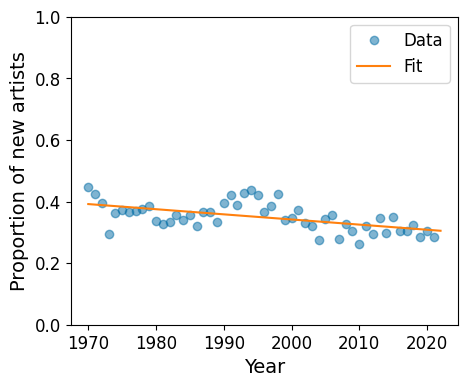

In [123]:
plt.figure(figsize=(5, 4))

model = pwlf.PiecewiseLinFit(range(1970, 2022), percentages[11:])
breaks = model.fit(1)

x = range(1970, 2022)
y = percentages[11:]

r_squared_best = model.r_squared()
p_values_best = model.p_values(method="non-linear")
slope_best = model.slopes[0]

test_slopes = []

for i in range(1, 1001):
    # shuffle points and perform piecewise linear regression
    y_test = np.random.permutation(y) 
    model_test = pwlf.PiecewiseLinFit(x, y_test)
    model_test.fit(1)
    slopes = model_test.slopes
    test_slopes.append(slopes[0])

# Compute 95% confidence interval (CI) for the observed statistic
lower_percentile = 2.5
upper_percentile = 97.5

ci_lower = np.percentile(test_slopes, lower_percentile)
ci_upper = np.percentile(test_slopes, upper_percentile)

print(f"Observed stat: {slope_best}")
print(f"95% CI: ({ci_lower:.4f}, {ci_upper:.4f})")

if slope_best < ci_lower or slope_best > ci_upper:
    print(f"Observed stat {slope_best} is outside the 95% CI (indicating significance).")
else:
    print(f"Observed stat {slope_best} is inside the 95% CI.")

print(f"Best r squared: {r_squared_best}")
print(f"P values: {p_values_best}")

x_hat = np.linspace(1970, 2022, 100)
y_hat = model.predict(x_hat)

plt.plot(range(1970, 2022), percentages[11:], 'o', alpha=0.5)
plt.plot(x_hat, y_hat)

plt.legend(["Data", "Fit"])
plt.xlabel("Year")
plt.ylabel("Proportion of new artists")
plt.ylim([0, 1])
plt.savefig("appendix/3.D.1.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show()

### Proportion of artists with X songs

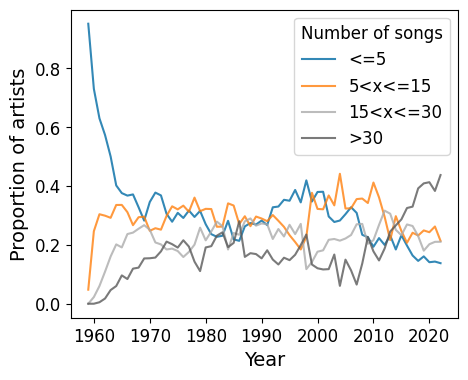

In [124]:
plt.figure(figsize=(5, 4))

df = billboard_hot_100[~((billboard_hot_100["artist"].str.lower().str.contains("featuring")) |\
        (billboard_hot_100["artist"].str.lower().str.contains("&")))]
songs_numbers_count = df[["year", "artist", "song_name"]].groupby(["year", "artist"])["song_name"].nunique().reset_index(name="number_of_songs")
averages_5_less = []
averages_3 = []
averages_5 = []
averages_10 = []

for year in range(1959, 2023):
    songs_until_year = songs_numbers_count[songs_numbers_count["year"] <= year].copy()
    songs_until_year["total_number_of_songs"] = songs_until_year.groupby(["artist"])["number_of_songs"].transform("sum")
    songs_from_this_year = songs_until_year[songs_until_year["year"] == year]["artist"]
    numbers_of_songs = songs_until_year[songs_until_year["artist"].isin(songs_from_this_year)].copy()
    numbers_of_songs["less_than_5"] = (numbers_of_songs["total_number_of_songs"] <= 5)
    numbers_of_songs["more_than_3_songs"] = (numbers_of_songs["total_number_of_songs"] > 5) & (numbers_of_songs["total_number_of_songs"] <= 15)
    numbers_of_songs["more_than_5_songs"] = (numbers_of_songs["total_number_of_songs"] > 15) & (numbers_of_songs["total_number_of_songs"] <= 30)
    numbers_of_songs["more_than_10_songs"] = numbers_of_songs["total_number_of_songs"] > 30
    averages_3.append(numbers_of_songs["more_than_3_songs"].mean())
    averages_5.append(numbers_of_songs["more_than_5_songs"].mean())
    averages_10.append(numbers_of_songs["more_than_10_songs"].mean())
    averages_5_less.append(numbers_of_songs["less_than_5"].mean())
    
plt.plot(range(1959, 2023), averages_5_less, alpha=0.8)
plt.plot(range(1959, 2023), averages_3, alpha=0.8)
plt.plot(range(1959, 2023), averages_5, alpha=0.8)
plt.plot(range(1959, 2023), averages_10, alpha=0.8)
plt.xlabel("Year")
plt.ylabel("Proportion of artists")
legend = plt.legend(["<=5", "5<x<=15", "15<x<=30", ">30"], title="Number of songs", fontsize=12, bbox_to_anchor=(1, 1))
legend.get_title().set_fontsize('12')
plt.savefig("appendix/3.B.1.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show()

## Hitmakers

### Distribution of number of songs

In [125]:
number_of_songs = billboard_hot_100[["artist", "song_name"]].drop_duplicates().groupby("artist")["song_name"].count().reset_index(name="song_count")
billboard_hot_100["number_of_songs"] = billboard_hot_100["artist"].map(lambda artist: number_of_songs[number_of_songs["artist"] == artist]["song_count"].iloc[0])

In [126]:
numbers_of_songs = billboard_hot_100[["artist", "number_of_songs"]].drop_duplicates()
count_numbers_of_songs = numbers_of_songs["number_of_songs"].value_counts().sort_index()

In [127]:
top_4_artists = numbers_of_songs[numbers_of_songs["number_of_songs"] > 30].sort_values("number_of_songs", ascending=False).head(4)

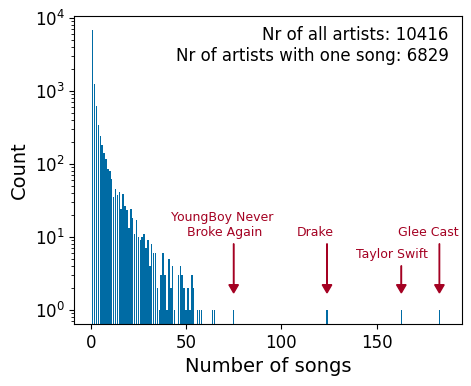

In [128]:
plt.figure(figsize=(5, 4))

plt.bar(count_numbers_of_songs.index, count_numbers_of_songs.values)
nartists = billboard_hot_100["artist"].nunique()
onesong = count_numbers_of_songs[1]
plt.text(90, 5000, f"Nr of all artists: {nartists}", fontsize=12)
plt.text(45, 2600, f"Nr of artists with one song: {onesong}", fontsize=12)

for i, (_, top_artist)in enumerate(top_4_artists.iterrows()):
    number_of_songs = top_artist["number_of_songs"]
    if i != 1:
        artist_text = top_artist["artist"]
        if len(top_artist["artist"]) > 15:
            artist_text = top_artist["artist"][:15] + "\n" + top_artist["artist"][15:]
            plt.text(number_of_songs - 5, 23, artist_text, fontsize=9, color=red, va="top", ha="center")
        else:
            plt.text(number_of_songs - 6, 14, artist_text, fontsize=9, color=red, va="top", ha="center")
        plt.arrow(number_of_songs, 8, 0, -5.8, width=0.2, head_width=5, head_length=0.5, color=red)
    else:
        plt.arrow(number_of_songs, 4, 0, -1.8, width=0.2, head_width=5, head_length=0.5, color=red)
        plt.text(number_of_songs - 5, 7, top_artist["artist"], fontsize=9, color=red, va="top", ha="center")

plt.xlabel("Number of songs")
plt.ylabel("Count")
plt.yscale("log")
plt.show()

### Proportion of songs by hitmakers

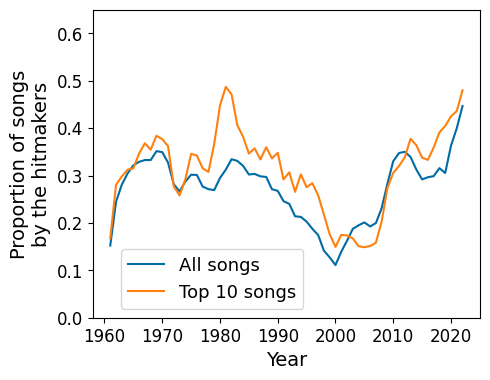

In [129]:
plt.figure(figsize=(5, 4))

songs_numbers_count = billboard_hot_100[["year", "artist", "song_name"]].groupby(
    ["year", "artist"])["song_name"].nunique().reset_index(name="number_of_songs")
averages = []
averages_10 = []
medians = []

for year in range(1959, 2023):
    songs_until_year = songs_numbers_count[songs_numbers_count["year"] <= year].copy()
    songs_until_year["total_number_of_songs"] = songs_until_year.groupby(["artist"])["number_of_songs"].transform("sum")
    songs_until_year["hitmaker"] = songs_until_year["total_number_of_songs"] > 10
    hitmakers = songs_until_year[songs_until_year["hitmaker"] == True]['artist']
    songs_from_this_year = billboard_hot_100[billboard_hot_100["year"] == year][["artist", 'song_name']].drop_duplicates()
    songs_from_this_year['hitmaker'] = songs_from_this_year["artist"].isin(hitmakers)
    averages.append(songs_from_this_year["hitmaker"].mean())

    songs_data_from_this_year = billboard_hot_100[billboard_hot_100["year"] == year][["artist", "song_name", "top_position"]].drop_duplicates().copy()
    songs_data_from_this_year = songs_data_from_this_year[songs_data_from_this_year["top_position"] <= 10]
    songs_data_from_this_year["hitmaker"] = songs_data_from_this_year["artist"].isin(hitmakers)
    averages_10.append(songs_data_from_this_year["hitmaker"].mean())
    
plt.plot(range(1959, 2023)[2:], moving_average(averages, 3))
plt.plot(range(1959, 2023)[2:], moving_average(averages_10, 3))
plt.xlabel("Year")
plt.ylabel("Proportion of songs\nby the hitmakers")
plt.legend(["All songs", "Top 10 songs"], loc="lower left", bbox_to_anchor=(0.05, 0), fontsize=13)
plt.ylim([0, 0.65])
plt.show()

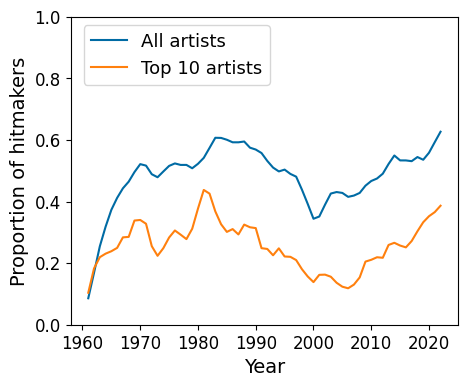

In [130]:
plt.figure(figsize=(5, 4))

songs_numbers_count = billboard_hot_100[["year", "artist", "song_name"]].groupby(["year", "artist"])["song_name"].nunique().reset_index(name="number_of_songs")
averages = []
averages_10 = []
medians = []

for year in range(1959, 2023):
    songs_until_year = songs_numbers_count[songs_numbers_count["year"] <= year].copy()
    songs_until_year["total_number_of_songs"] = songs_until_year.groupby(["artist"])["number_of_songs"].transform("sum")
    songs_from_this_year = songs_until_year[songs_until_year["year"] == year]["artist"]
    numbers_of_songs = songs_until_year[songs_until_year["artist"].isin(songs_from_this_year)].drop_duplicates().copy()
    numbers_of_songs["hitmaker"] = numbers_of_songs["total_number_of_songs"] > 10
    averages.append(numbers_of_songs["hitmaker"].mean())

    hitmakers = numbers_of_songs[numbers_of_songs["hitmaker"] == True]["artist"]
    songs_data_from_this_year = billboard_hot_100[billboard_hot_100["year"] == year][["artist", "year", "top_position"]].drop_duplicates().copy()
    songs_data_from_this_year = songs_data_from_this_year[songs_data_from_this_year["top_position"] <= 10]
    songs_data_from_this_year["hitmaker"] = songs_data_from_this_year["artist"].isin(hitmakers)
    songs_data_from_this_year = songs_data_from_this_year[["hitmaker", "artist"]].drop_duplicates()
    averages_10.append(songs_data_from_this_year["hitmaker"].mean())
    
plt.plot(range(1959, 2023)[2:], moving_average(averages, 3))
plt.plot(range(1959, 2023)[2:], moving_average(averages_10, 3))
plt.xlabel("Year")
plt.ylabel("Proportion of hitmakers")
plt.legend(["All artists", "Top 10 artists"], loc="lower left", bbox_to_anchor=(0.01, 0.75), fontsize=13)
plt.ylim([0, 1])
plt.show()

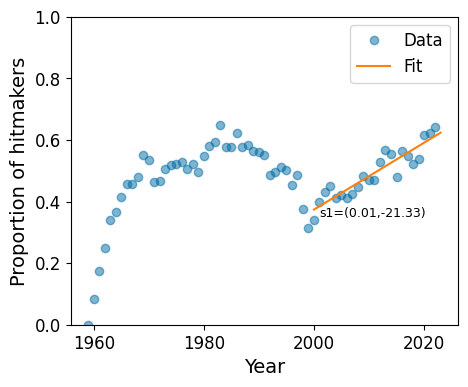

Break years: [2000 2022]
{'observed_slope': np.float64(0.010854138049487773), 'observed_intercept': np.float64(-21.334529053270117), 'slope_p_value': np.float64(0.0), 'slope_CI': (np.float64(-0.005035674169802047), np.float64(0.004907539351374872))}


In [158]:
plt.figure(figsize=(5, 4))

x = range(2000, 2023)
y = averages

model = pwlf.PiecewiseLinFit(x, y[41:])
x_hat = np.linspace(2000, 2023, 100)
values = model.fit(1)
y_hat = model.predict(x_hat)
plt.plot(range(1959, 2023), y, 'o', alpha=0.5)
plt.plot(x_hat, y_hat, '-')
slopes = model.calc_slopes()
intercepts = model.intercepts

for i, (slope, intercept) in enumerate(zip(slopes, intercepts)):
    plt.text(values[i] + 1, y[np.round(values[i].astype(int)) - 1959] + 0.01, f"s{i+1}=({slope:.2f},{intercept:.2f})", fontsize=9)

plt.xlabel("Year")
plt.ylabel("Proportion of hitmakers")
plt.ylim([0, 1])
plt.legend(["Data", "Fit"], loc="upper right")
plt.savefig("appendix/3.B.2.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show()

print(f"Break years: {values}")
print(permutation_test_with_observed_values(x, y[41:], model.calc_slopes()[0], model.intercepts[0], 1000))

## Hitmakers top ranks

Text(0, 0.5, 'Top position')

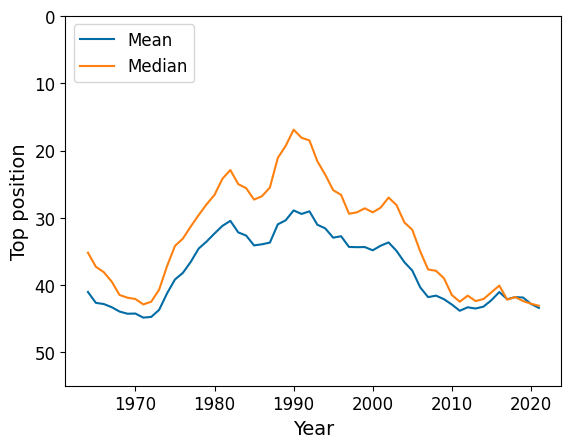

In [ ]:
df = billboard_hot_100[~((billboard_hot_100["artist"].str.lower().str.contains("featuring")) |\
        (billboard_hot_100["artist"].str.lower().str.contains("&")))]
songs_numbers_count = df[["year", "artist", "song_name"]].groupby(["year", "artist"])["song_name"].nunique().reset_index(name="number_of_songs")

averages = []
medians = []

for year in range(1959, 2022):
    songs_until_year = songs_numbers_count[songs_numbers_count["year"] <= year].copy()
    songs_until_year["total_number_of_songs"] = songs_until_year.groupby(["artist"])["number_of_songs"].transform("sum")
    songs_until_year["hitmaker"] = songs_until_year["total_number_of_songs"] > 10
    hitmakers = songs_until_year[songs_until_year["hitmaker"] == True]['artist']
    hitmakers_songs = billboard_hot_100[billboard_hot_100["artist"].isin(hitmakers) & (billboard_hot_100["year"] == year)].groupby(['artist', 'song_name', 'top_position']).first().reset_index()
    averages.append(hitmakers_songs["top_position"].mean())
    medians.append(hitmakers_songs["top_position"].median())

plt.plot(range(1959, 2022)[4:], moving_average(averages,5))
plt.plot(range(1959, 2022)[4:], moving_average(medians,5))

plt.gca().invert_yaxis()
plt.legend(["Mean", "Median"], loc="upper left")
plt.ylim([55, 0])
plt.xlabel("Year")
plt.ylabel("Top position")

1988.0000000686375
[{'segment': 1, 'observed_slope': np.float64(-0.5284827943484619), 'observed_intercept': np.float64(1080.7857988649641), 'slope_p_value': np.float64(0.0), 'slope_CI': (np.float64(-0.2672191722321918), np.float64(0.2662966668220293))}, {'segment': 2, 'observed_slope': np.float64(0.4858956253198428), 'observed_intercept': np.float64(-935.79849950525), 'slope_p_value': np.float64(0.0), 'slope_CI': (np.float64(-0.1980967097012373), np.float64(0.20063668440442975))}]
AIC for k=1:  220.31027527639745
AIC for k=4:  167.50143932662806
Observed AIC diff: 52.80883594976939
95% CI: (170.956, 180.490)
Observed AIC diff 52.809 is outside the 95% CI (indicating significance).


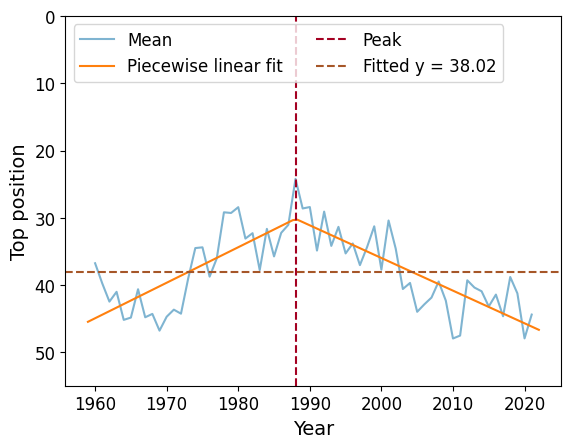

In [ ]:
from scipy.stats import norm

model = pwlf.PiecewiseLinFit(range(1960, 2022), averages[1:])
values = model.fit(2)
x_hat = np.linspace(1959, 2022, 100)
y_hat = model.predict(x_hat)

print(values[1])
print(test_segments(np.array(range(1960, 2022)), np.array(averages[1:]), [values[1]], model.calc_slopes(), model.intercepts))

plt.plot(range(1959, 2022), averages, alpha=0.5)
plt.plot(x_hat, y_hat)
plt.axvline(x=values[1], color=red, linestyle='--')

from scipy.optimize import minimize
x = np.array(range(1960, 2022))
y = np.array(averages[1:])

def calc_aic(y_true, y_pred, k):
    n = len(y_true)
    residual = y_true - y_pred
    rss = np.sum(residual**2)
    aic = n * np.log(rss/n) + 2*k
    return aic

def objective_function(b, data):
    k = 1
    logL = np.sum(np.log(norm.pdf(data, loc=b, scale=np.std(data, ddof=1))))
    return 2 * k - 2 * logL

# Optimize to find b that minimizes AIC
result = minimize(lambda b: objective_function(b, averages[1:]), x0=[np.mean(averages[1:])])  # Initial guess for b
b_fit = result.x[0]

# Calculate AIC for horizontal line (k=1) and piecewise model (k=4: 2 segments, each with slope and intercept)
aic_horizontal = calc_aic(y, np.ones_like(y) * b_fit, 1)
aic_piecewise = calc_aic(y, model.predict(x), 4)
print("AIC for k=1: ", aic_horizontal)
print("AIC for k=4: ", aic_piecewise)
aic_diff = aic_horizontal - aic_piecewise  # Positive means piecewise is better

aic_diffs = []

for i in range(1, 1001):
    y_test = np.random.permutation(y)
    result1 = minimize(lambda b: objective_function(b, y_test), x0=[np.mean(y_test)])
    b_random = result1.x[0]
    
    pwlf_model = pwlf.PiecewiseLinFit(x, y_test)
    pwlf_model.fit(2)
    
    aic_horizontal_random = calc_aic(y_test, np.ones_like(y_test) * b_random, 1)
    aic_piecewise_random = calc_aic(y_test, pwlf_model.predict(x), 4)
    aic_diffs.append(aic_horizontal_random - aic_piecewise_random)

lower_percentile = 2.5
upper_percentile = 97.5

ci_lower = np.percentile(aic_diffs, lower_percentile)
ci_upper = np.percentile(aic_diffs, upper_percentile)

print(f"Observed AIC diff: {aic_diff}")
print(f"95% CI: ({ci_lower:.3f}, {ci_upper:.3f})")

if aic_diff < ci_lower or aic_diff > ci_upper:
    print(f"Observed AIC diff {aic_diff:.3f} is outside the 95% CI (indicating significance).")
else:
    print(f"Observed AIC diff {aic_diff:.3f} is inside the 95% CI.")

# Plotting
plt.axhline(b_fit, linestyle="--", color=brown)

plt.gca().invert_yaxis()
plt.legend(["Mean", "Piecewise linear fit", "Peak", f"Fitted y = {b_fit:.2f}"], ncol=2, loc="upper left")
plt.ylim([55, 0])
plt.xlabel("Year")
plt.ylabel("Top position")
plt.savefig("appendix/3.E.1.jpg", format="jpg", dpi=300)

plt.show()

In [ ]:
import statistics
songs_numbers_count = billboard_hot_100[["year", "artist", "song_name"]].groupby(["year", "artist"])["song_name"].nunique().reset_index(name="number_of_songs")

averages = []
stds = []

songs_until_year = songs_numbers_count[songs_numbers_count["year"] <= 1990].copy()
songs_until_year["total_number_of_songs"] = songs_until_year.groupby(["artist"])["number_of_songs"].transform("sum")
songs_until_year["hitmaker"] = songs_until_year["total_number_of_songs"] > 10
hitmakers = songs_until_year[songs_until_year["hitmaker"] == True]['artist']
hitmakers_songs = billboard_hot_100[billboard_hot_100["artist"].isin(hitmakers) & (billboard_hot_100["year"].isin(range(1980, 1991)))].groupby(['artist', 'song_name']).first().copy()
percentage = billboard_hot_100[billboard_hot_100["artist"].isin(hitmakers) & (billboard_hot_100["year"].isin(range(1980, 1991)))].groupby(['artist', 'song_name']).count().shape[0] / billboard_hot_100[billboard_hot_100["year"] <= 1990].groupby(['artist', 'song_name']).count().shape[0]
print(f'Percentage of songs by htimakers {percentage}')
data = hitmakers_songs["top_position"].value_counts().sort_index()
variance1 = np.var(hitmakers_songs["top_position"])
n1 = len(hitmakers_songs["top_position"])
data1 = hitmakers_songs["top_position"].values
data_1 = data
print(np.mean(data_1))
print(np.std(data_1))
print(f'Variance {statistics.variance(hitmakers_songs["top_position"])}')

Percentage of songs by htimakers 0.11132293471981514
19.663265306122447
19.617226851361433
Variance 744.0113956935951


In [ ]:
songs_numbers_count = billboard_hot_100[["year", "artist", "song_name"]].groupby(["year", "artist"])["song_name"].nunique().reset_index(name="number_of_songs")

averages = []
stds = []

songs_until_year = songs_numbers_count[songs_numbers_count["year"] <= 2020].copy()
songs_until_year["total_number_of_songs"] = songs_until_year.groupby(["artist"])["number_of_songs"].transform("sum")
songs_until_year["hitmaker"] = songs_until_year["total_number_of_songs"] > 10
hitmakers = songs_until_year[songs_until_year["hitmaker"] == True]['artist']
hitmakers_songs = billboard_hot_100[billboard_hot_100["artist"].isin(hitmakers) & (billboard_hot_100["year"].isin(range(2010, 2021)))].groupby(['artist', 'song_name']).first().copy()
percentage = billboard_hot_100[billboard_hot_100["artist"].isin(hitmakers) & (billboard_hot_100["year"].isin(range(2010, 2021)))].groupby(['artist', 'song_name']).count().shape[0] / billboard_hot_100[billboard_hot_100["year"] >= 2000].groupby(['artist', 'song_name']).count().shape[0]
print(f'Percentage of songs by htimakers {percentage}')
data = hitmakers_songs["top_position"].value_counts().sort_index()
variance2 = np.var(hitmakers_songs["top_position"])
n2 = len(hitmakers_songs["top_position"])
data2 = hitmakers_songs["top_position"].values
print(f'Variance {statistics.variance(hitmakers_songs["top_position"])}')
data_2 = data


Percentage of songs by htimakers 0.22644361584198328
Variance 825.4651001969183


C:\Users\cutie\AppData\Local\Temp\ipykernel_13840\555954072.py:6: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axes[0].set_ylim([0, 500])
C:\Users\cutie\AppData\Local\Temp\ipykernel_13840\555954072.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axes[1].set_ylim([0, 500])


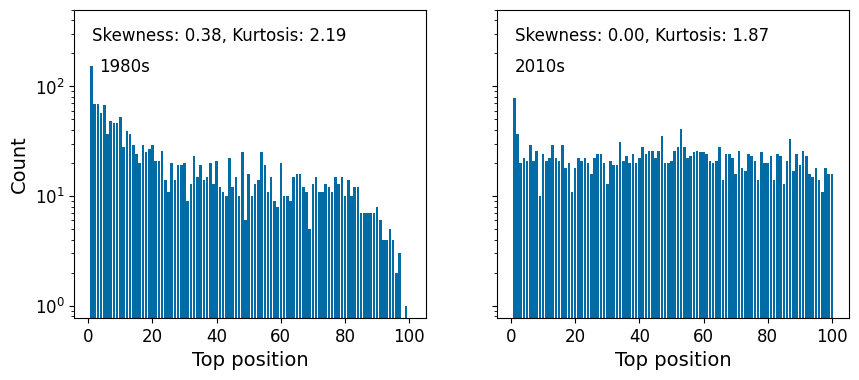

In [ ]:
from statsmodels.stats.stattools import medcouple
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)

axes[0].bar(data_1.index, data_1.values)
axes[0].set_yscale("log")
axes[0].set_ylim([0, 500])
skewness1 = medcouple(data1)
kurtosis1 = np.mean((data1 - np.mean(data1))**4) / np.std(data1)**4
axes[0].text(0.05, 0.9, f"Skewness: {skewness1:.2f}, Kurtosis: {kurtosis1:.2f}", transform=axes[0].transAxes)
axes[0].text(0.07, 0.8, f"1980s", transform=axes[0].transAxes)

axes[1].bar(data_2.index, data_2.values)
axes[1].set_yscale("log")
axes[1].set_ylim([0, 500])
skewness2 = medcouple(data2)
kurtosis2 = np.mean((data2 - np.mean(data2))**4) / np.std(data2)**4
axes[1].text(0.05, 0.9, f"Skewness: {skewness2:.2f}, Kurtosis: {kurtosis2:.2f}", transform=axes[1].transAxes)
axes[1].text(0.05, 0.8, f"2010s", transform=axes[1].transAxes)
axes[0].set_ylabel("Count")
axes[0].set_xlabel("Top position")
axes[1].set_xlabel("Top position")
plt.savefig("appendix/3.E.2.jpg", format="jpg", dpi=300, bbox_inches="tight")

plt.show()

In [ ]:
def swap_decade_column(df):
    # Create a copy of the dataframe to avoid modifying the original
    df_copy = df.copy()
    
    # For each top position (1-100)
    for i in range(1, 101):
        # Get rows with this top position
        mask = df_copy["top_position"] == i
        
        # If there are any rows with this top position
        if mask.any():
            # Get the number of rows with this top position
            n_rows = mask.sum()
            
            # Generate random decade choices ('1980' or '2010')
            # Must create an array of the right length
            random_decades = np.random.choice(['1980', '2010'], size=n_rows)
            # Assign the random decades to the filtered rows
            df_copy.loc[mask, "decade"] = random_decades
    
    return df_copy

In [ ]:
df = pd.DataFrame(columns=['top_position', 'count', 'decade'])
for i in range(1, 101):
    if (data_1.get(i) != None):
        df = pd.concat([df, pd.DataFrame({'top_position': [i], 'count': [data_1[i]], 'decade': ['1980']})], ignore_index=True)
    if (data_2.get(i) != None):
        df = pd.concat([df, pd.DataFrame({'top_position': [i], 'count': [data_2[i]], 'decade': ['2010']})], ignore_index=True)

skewness_ratio = []
df_copy = df.copy() 
for i in range(1, 1001):
    # shuffle decade column
    df_copy = df.copy() 
    df_copy = swap_decade_column(df_copy)
    data_1_copy = df_copy[df_copy["decade"] == "1980"].reset_index()["count"].values
    data_2_copy = df_copy[df_copy["decade"] == "2010"].reset_index()["count"].values
    skewness_1_test = medcouple(data_1_copy)
    skewness_2_test = medcouple(data_2_copy)
    skewness_ratio.append((skewness_1_test - skewness_2_test))

lower_percentile = 2.5
upper_percentile = 97.5

ci_lower = np.percentile(skewness_ratio, lower_percentile)
ci_upper = np.percentile(skewness_ratio, upper_percentile)

skewness_ratio_obs = (skewness1 - skewness2)
print(f"Observed skewness diff: {skewness_ratio_obs}")
print(f"95% CI: ({ci_lower:.4f}, {ci_upper:.4f})")

if skewness_ratio_obs < ci_lower or skewness_ratio_obs > ci_upper:
    print(f"Observed skewness diff {skewness_ratio_obs} is outside the 95% CI (indicating significance).")
else:
    print(f"Observed skewness diff {skewness_ratio_obs} is inside the 95% CI.")


Observed skewness diff: 0.38461538461538464
95% CI: (-0.2800, 0.2857)
Observed skewness diff 0.38461538461538464 is outside the 95% CI (indicating significance).


21.942528735632184
17.795360574411305


C:\Users\cutie\AppData\Local\Temp\ipykernel_13840\414185152.py:17: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axes[0].set_ylim([0, 500])
C:\Users\cutie\AppData\Local\Temp\ipykernel_13840\414185152.py:25: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axes[1].set_ylim([0, 500])


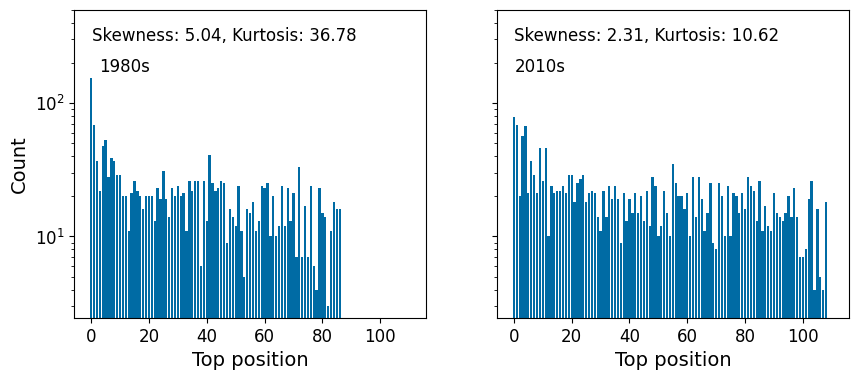

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)

df = pd.DataFrame(columns=['top_position', 'count', 'decade'])
for i in range(1, 101):
    if (data_1.get(i) != None):
        df = pd.concat([df, pd.DataFrame({'top_position': [i], 'count': [data_1[i]], 'decade': ['1980']})], ignore_index=True)
    if (data_2.get(i) != None):
        df = pd.concat([df, pd.DataFrame({'top_position': [i], 'count': [data_2[i]], 'decade': ['2010']})], ignore_index=True)

df = swap_decade_column(df)
data_1_test = df[df["decade"] == "1980"].reset_index()["count"]
data_2_test = df[df["decade"] == "2010"].reset_index()["count"]
print(np.mean(data_1_test))
print(np.std(data_1_test))
axes[0].bar(data_1_test.index, data_1_test.values)
axes[0].set_yscale("log")
axes[0].set_ylim([0, 500])
skewness1 = np.mean((data_1_test - np.mean(data_1_test))**3) / np.std(data_1_test)**3
kurtosis1 = np.mean((data_1_test - np.mean(data_1_test))**4) / np.std(data_1_test)**4
axes[0].text(0.05, 0.9, f"Skewness: {skewness1:.2f}, Kurtosis: {kurtosis1:.2f}", transform=axes[0].transAxes)
axes[0].text(0.07, 0.8, f"1980s", transform=axes[0].transAxes)

axes[1].bar(data_2_test.index, data_2_test.values)
axes[1].set_yscale("log")
axes[1].set_ylim([0, 500])
skewness2 = np.mean((data_2_test - np.mean(data_2_test))**3) / np.std(data_2_test)**3
kurtosis2 = np.mean((data_2_test - np.mean(data_2_test))**4) / np.std(data_2_test)**4
axes[1].text(0.05, 0.9, f"Skewness: {skewness2:.2f}, Kurtosis: {kurtosis2:.2f}", transform=axes[1].transAxes)
axes[1].text(0.05, 0.8, f"2010s", transform=axes[1].transAxes)
axes[0].set_ylabel("Count")
axes[0].set_xlabel("Top position")
axes[1].set_xlabel("Top position")

plt.show()

In [ ]:
import numpy as np
from scipy.stats import fligner

stat, p_value = fligner(data1, data2)

print(f"Fligner-Killeen Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The variances are significantly different.")
else:
    print("The variances are not significantly different.")

Fligner-Killeen Test Statistic: 2.9926427045840938
P-value: 0.08364356242205209
The variances are not significantly different.


In [ ]:
from scipy.stats import levene

stat, p_value = levene(data1, data2, center='mean') 

if p_value < 0.05:
    print(f"Variances are significantly different (p = {p_value:.3f})")
else:
    print(f"Variances are not significantly different (p = {p_value:.3f})")

Variances are significantly different (p = 0.026)


In [ ]:
import numpy as np
from scipy.stats import mannwhitneyu

songs_numbers_count = billboard_hot_100[["year", "artist", "song_name"]].groupby(["year", "artist"])["song_name"].nunique().reset_index(name="number_of_songs")

def get_avg_top_position(year):
    songs_until_year = songs_numbers_count[songs_numbers_count["year"] <= year].copy()
    songs_until_year["total_number_of_songs"] = songs_until_year.groupby(["artist"])["number_of_songs"].transform("sum")
    songs_until_year["hitmaker"] = songs_until_year["total_number_of_songs"] > 10
    hitmakers = songs_until_year[songs_until_year["hitmaker"] == True]['artist']
    data = billboard_hot_100[billboard_hot_100["artist"].isin(hitmakers) & (billboard_hot_100["year"] == year)].groupby(['artist', 'song_name', 'top_position']).first().copy().reset_index()
    return data["top_position"].mean()

important_years = [1987, 1988, 1989]

# Interpret
for year in important_years:
    random_years = np.random.choice(range(1959, 2022), size=30, replace=False)
    avg_top_position = get_avg_top_position(year)
    avg_random = [get_avg_top_position(x) for x in random_years]
    print(f"Avg top position in {year}: {avg_top_position:.2f}")
    print(f"Avg top position in random years: {avg_random}")

    # Mann-Whitney U Test
    stat, p_value = mannwhitneyu([avg_top_position], avg_random, alternative='greater')

    if p_value <= 0.05:
        print(f"Significant difference in top position in {year}")

Avg top position in 1987: 30.75
Avg top position in random years: [np.float64(44.371308016877634), np.float64(39.839506172839506), np.float64(45.91089108910891), np.float64(36.0709219858156), np.float64(42.483870967741936), np.float64(31.64375), np.float64(29.08823529411765), np.float64(42.33888888888889), np.float64(44.17045454545455), np.float64(40.39208633093525), np.float64(39.847682119205295), np.float64(34.42307692307692), np.float64(47.535885167464116), np.float64(28.508474576271187), np.float64(41.25757575757576), np.float64(32.91860465116279), nan, np.float64(41.333333333333336), np.float64(29.282894736842106), np.float64(35.397260273972606), np.float64(34.40449438202247), np.float64(39.774358974358975), np.float64(48.0633608815427), np.float64(44.75769230769231), np.float64(30.492957746478872), np.float64(44.49049429657795), np.float64(31.27659574468085), np.float64(40.903361344537814), np.float64(44.283236994219656), np.float64(37.26900584795322)]
Avg top position in 1988: 2

### Together

100%|██████████| 63/63 [00:20<00:00,  3.05it/s]
C:\Users\cutie\AppData\Local\Temp\ipykernel_13840\4245904038.py:157: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  plt.savefig("fig3.jpg", format="jpg", bbox_inches='tight', dpi=300)
C:\Users\cutie\AppData\Local\Temp\ipykernel_13840\4245904038.py:157: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  plt.savefig("fig3.jpg", format="jpg", bbox_inches='tight', dpi=300)
C:\Users\cutie\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


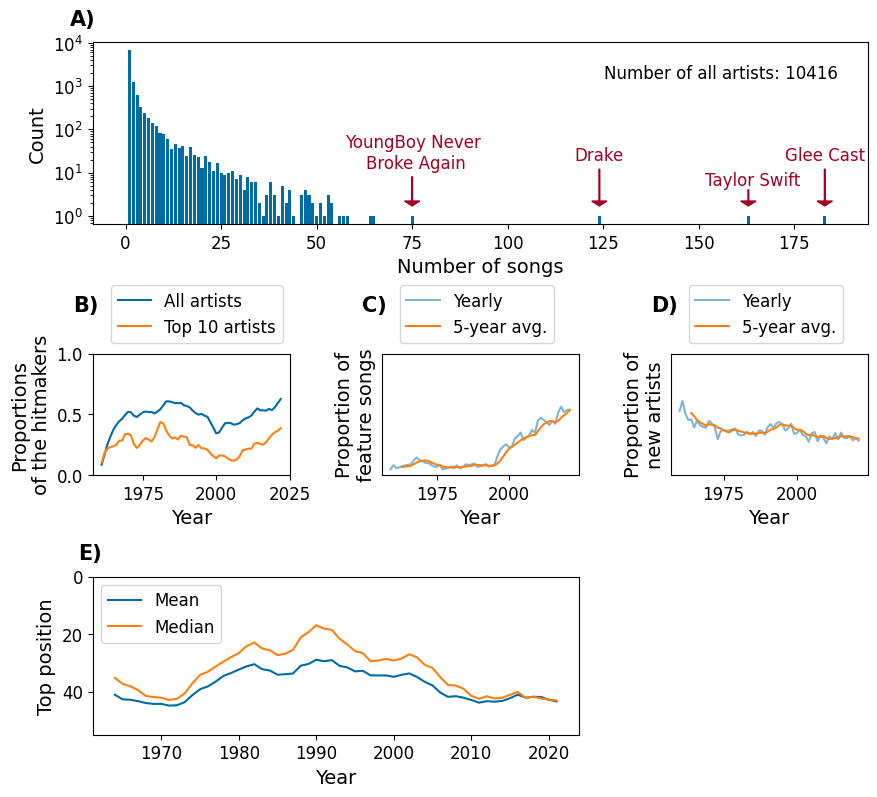

In [ ]:
fig, axes = plt.subplot_mosaic([["A", "A", "A", "A", "A", "A", "A", "A"],
                                [".", ".", ".", ".", ".", ".", ".", "."],
                                ["B", "B", ".", "C", "C", ".", "D", "D"],
                                [".", ".", ".", ".", ".", ".", ".", "."],
                                ["E", "E", "E", "E", "E", ".", ".", "."]], figsize=(10, 9),
    gridspec_kw={'height_ratios': [1.5, 0.25, 1, 0.02, 1.3], 'width_ratios': [1, 1, 0.3, 1, 1, 0.3, 1, 1],
                'wspace': 0.5, 'hspace': 0.5}, constrained_layout=True)

# Plot A

ax = axes["A"]

ax.bar(count_numbers_of_songs.index, count_numbers_of_songs.values)
nartists = billboard_hot_100["artist"].nunique()
ax.text(0.66, 0.8, f"Number of all artists: {nartists}", transform=ax.transAxes)

for i, (_, top_artist) in enumerate(top_4_artists.iterrows()):
    number_of_songs = top_artist["number_of_songs"]
    if i != 1:
        artist_text = top_artist["artist"]
        if len(top_artist["artist"]) > 15:
            artist_text = top_artist["artist"][:15] + "\n" + top_artist["artist"][15:]
            ax.text(number_of_songs + 1, 80, artist_text, color=red, va="top", ha="center")
            ax.arrow(number_of_songs, 8, 0, -5.8, width=0.2, head_width=4, head_length=0.5, color=red)
        else:
            ax.text(number_of_songs, 40, artist_text, color=red, va="top", ha="center")
            ax.arrow(number_of_songs, 12, 0, -9.8, width=0.2, head_width=4, head_length=0.5, color=red)
    else:
        ax.arrow(number_of_songs, 4, 0, -1.8, width=0.2, head_width=4, head_length=0.5, color=red)
        ax.text(number_of_songs + 1, 11, top_artist["artist"], color=red, va="top", ha="center")

ax.set_xlabel("Number of songs")
ax.set_ylabel("Count")
ax.set_yscale("log")

axes['A'].text(-0.03, 1.09, 'A)', transform=axes['A'].transAxes, weight='bold', fontsize=15)

# Plot B

ax = axes["B"]

songs_numbers_count = billboard_hot_100[["year", "artist", "song_name"]].groupby(["year", "artist"])["song_name"].nunique().reset_index(name="number_of_songs")
averages = []
averages_10 = []
medians = []

for year in range(1959, 2023):
    songs_until_year = songs_numbers_count[songs_numbers_count["year"] <= year].copy()
    songs_until_year["total_number_of_songs"] = songs_until_year.groupby(["artist"])["number_of_songs"].transform("sum")
    songs_from_this_year = songs_until_year[songs_until_year["year"] == year]["artist"]
    numbers_of_songs = songs_until_year[songs_until_year["artist"].isin(songs_from_this_year)].drop_duplicates().copy()
    numbers_of_songs["hitmaker"] = numbers_of_songs["total_number_of_songs"] > 10
    averages.append(numbers_of_songs["hitmaker"].mean())

    hitmakers = numbers_of_songs[numbers_of_songs["hitmaker"] == True]["artist"]
    songs_data_from_this_year = billboard_hot_100[billboard_hot_100["year"] == year][["artist", "year", "top_position"]].drop_duplicates().copy()
    songs_data_from_this_year = songs_data_from_this_year[songs_data_from_this_year["top_position"] <= 10]
    songs_data_from_this_year["hitmaker"] = songs_data_from_this_year["artist"].isin(hitmakers)
    songs_data_from_this_year = songs_data_from_this_year[["hitmaker", "artist"]].drop_duplicates()
    averages_10.append(songs_data_from_this_year["hitmaker"].mean())
    
ax.plot(range(1959, 2023)[2:], moving_average(averages, 3))
ax.plot(range(1959, 2023)[2:], moving_average(averages_10, 3))
ax.set_xlabel("Year")
ax.set_ylabel("Proportions\nof the hitmakers")
ax.legend(["All artists", "Top 10 artists"], loc="upper left", bbox_to_anchor=(0.05, 1.63))
ax.set_ylim([0, 1])

axes['B'].text(-0.1, 1.35, 'B)', transform=axes['B'].transAxes, weight='bold', fontsize=15)

# Plot C

ax = axes["C"]

percentages = []

for year in tqdm(years):
    artists_from_year = billboard_hot_100[billboard_hot_100["year"] == year][["artist"]].drop_duplicates()
    artists_features = artists_from_year[(artists_from_year["artist"].str.lower().str.contains("featuring")) |\
        (artists_from_year["artist"].str.lower().str.contains("&"))]
    percentage_of_new_features = len(artists_features)/len(artists_from_year)
    percentages.append(percentage_of_new_features)

ax.plot(years, percentages, alpha=0.5)
ax.plot(years[4:], moving_average(percentages, 5))
ax.set_yticks([])
ax.set_yticks([], minor=True)
ax.yaxis.set_tick_params(labelbottom=False)

ax.set_xlabel("Year")
ax.set_ylim([0, 1])
ax.set_ylabel("Proportion of\nfeature songs")
ax.legend(["Yearly", "5-year avg."], loc="upper left", bbox_to_anchor=(0.05, 1.63))

axes['C'].text(-0.1, 1.35, 'C)', transform=axes['C'].transAxes, weight='bold', fontsize=15)

# Plot D

ax = axes["D"]

percentages = []
first_week = billboard_hot_100["first_day_of_the_week"].min() + timedelta(weeks=1)
last_week = billboard_hot_100["first_day_of_the_week"].max()

for year in tqdm(years):
    artists_from_year = billboard_hot_100[(billboard_hot_100["year"] == year) &\
        ~((billboard_hot_100["artist"].str.lower().str.contains("featuring")) |\
        (billboard_hot_100["artist"].str.lower().str.contains("&")))][["artist"]].drop_duplicates()
    artists_from_previous_years = billboard_hot_100[billboard_hot_100["year"] < year]["artist"].drop_duplicates()
    new_artists = artists_from_year[~artists_from_year["artist"].isin(artists_from_previous_years)]
    percentage_of_new_artists = len(new_artists)/len(artists_from_year)
    percentages.append(percentage_of_new_artists)

ax.plot(years[1:], percentages[1:], alpha=0.5)
ax.plot(years[5:], moving_average(percentages[1:], 5))
ax.set_yticks([])
ax.set_yticks([], minor=True)
ax.yaxis.set_tick_params(labelbottom=False)

ax.set_xlabel("Year")
ax.set_ylabel("Proportion of\nnew artists")
ax.set_ylim([0, 1])
ax.legend(["Yearly", "5-year avg."], loc="upper left", bbox_to_anchor=(0.05, 1.63))

axes['D'].text(-0.1, 1.35, 'D)', transform=axes['D'].transAxes, weight='bold', fontsize=15)

# Plot E

ax = axes["E"]
df = billboard_hot_100[~((billboard_hot_100["artist"].str.lower().str.contains("featuring")) |\
        (billboard_hot_100["artist"].str.lower().str.contains("&")))]
songs_numbers_count = df[["year", "artist", "song_name"]].groupby(["year", "artist"])["song_name"].nunique().reset_index(name="number_of_songs")

averages = []
medians = []

for year in range(1959, 2022):
    songs_until_year = songs_numbers_count[songs_numbers_count["year"] <= year].copy()
    songs_until_year["total_number_of_songs"] = songs_until_year.groupby(["artist"])["number_of_songs"].transform("sum")
    songs_until_year["hitmaker"] = songs_until_year["total_number_of_songs"] > 10
    hitmakers = songs_until_year[songs_until_year["hitmaker"] == True]['artist']
    hitmakers_songs = billboard_hot_100[billboard_hot_100["artist"].isin(hitmakers) & (billboard_hot_100["year"] == year)].groupby(['artist', 'song_name', 'top_position']).first().reset_index()
    averages.append(hitmakers_songs["top_position"].mean())
    medians.append(hitmakers_songs["top_position"].median())

ax.plot(range(1959, 2022)[4:], moving_average(averages,5))
ax.plot(range(1959, 2022)[4:], moving_average(medians,5))

ax.invert_yaxis()
ax.legend(["Mean", "Median"], loc="upper left")
ax.set_ylim([55, 0])
ax.set_xlabel("Year")
ax.set_ylabel("Top position")

axes['E'].text(-0.03, 1.11, 'E)', transform=axes['E'].transAxes, weight='bold', fontsize=15)

plt.savefig("fig3.jpg", format="jpg", bbox_inches='tight', dpi=300)
plt.show()